<h1> Model Recovery<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model-comparison" data-toc-modified-id="Model-comparison-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model comparison</a></span></li><li><span><a href="#Confusion-matrix-and-Inversion-matrix" data-toc-modified-id="Confusion-matrix-and-Inversion-matrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Confusion matrix and Inversion matrix</a></span><ul class="toc-item"><li><span><a href="#Default-settings" data-toc-modified-id="Default-settings-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Default settings</a></span></li><li><span><a href="#Fewer-trial-numbers" data-toc-modified-id="Fewer-trial-numbers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fewer trial numbers</a></span></li></ul></li><li><span><a href="#Add-bias-terms-(important-for-real-data)" data-toc-modified-id="Add-bias-terms-(important-for-real-data)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add bias terms (important for real data)</a></span><ul class="toc-item"><li><span><a href="#Fit-data-with-and-without-bias" data-toc-modified-id="Fit-data-with-and-without-bias-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fit data with and without bias</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Confusion matrix</a></span></li></ul></li></ul></div>

In [1]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget

import numpy as np
from utils.run_model_recovery import *
import multiprocessing as mp
import matplotlib.pyplot as plt

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

# Model comparison

Just some examples here

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 5.38629, BIC = 15.2018 (done in 7.03 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1217.14, BIC = 1226.96 (done in 3.83 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 661.842, BIC = 671.658 (done in 4.6 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 665.842, BIC = 685.473 (done in 8.64 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 988.138, BIC = 997.954 (done in 3.2 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 989.27, BIC = 1003.99 (done in 4.51 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 676.835, BIC = 691.559 (done in 7.23 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 500.189, BIC = 519.82 (done in 6.95 secs)


<IPython.core.display.Javascript object>


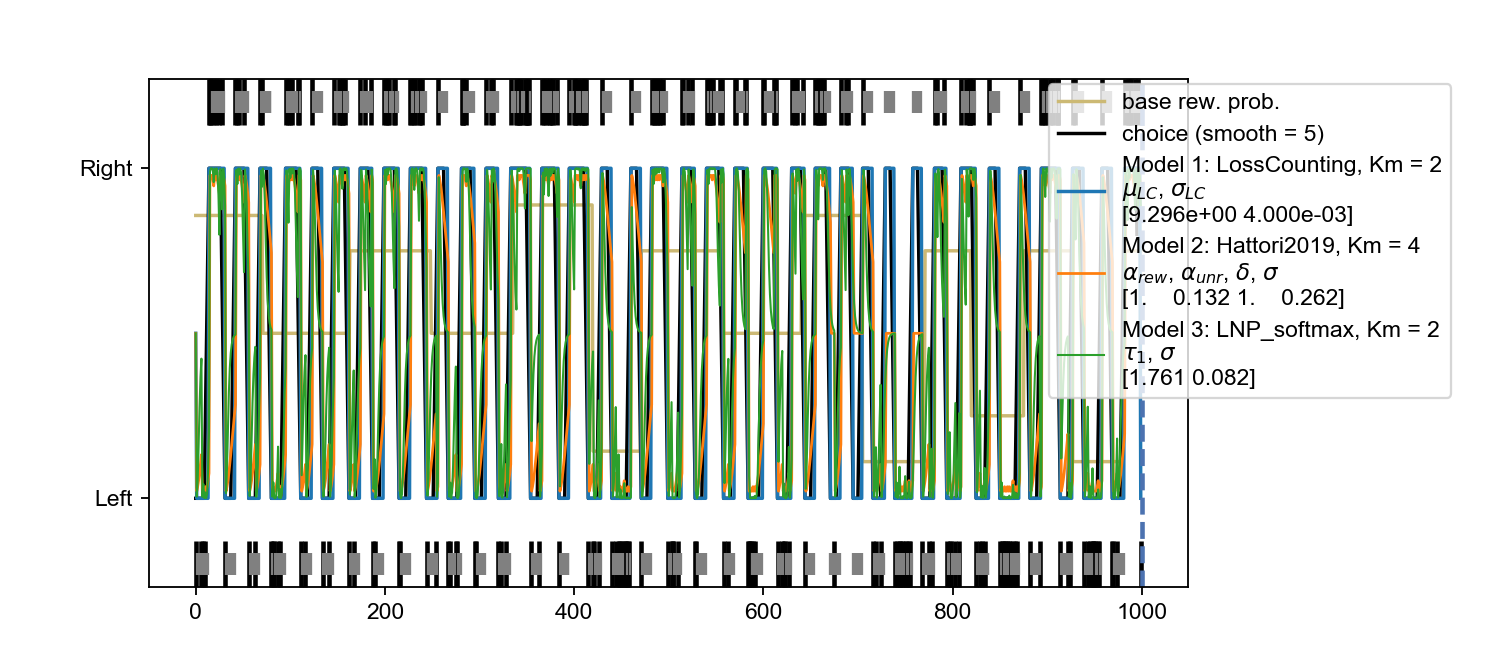

model  Km      AIC  log10_BF_AIC  model_weight_AIC      BIC  \
1    LossCounting   2     5.39         -0.00               1.0    15.20   
8     Hattori2019   4   500.19       -107.45               0.0   519.82   
3     LNP_softmax   2   661.84       -142.55               0.0   671.66   
4     LNP_softmax   4   665.84       -143.42               0.0   685.47   
7        Bari2019   3   676.84       -145.80               0.0   691.56   
5  RW1972_softmax   2   988.14       -213.40               0.0   997.95   
6     Hattori2019   3   989.27       -213.65               0.0  1003.99   
2     RW1972_epsi   2  1217.14       -263.13               0.0  1226.96   

   log10_BF_BIC  model_weight_BIC  \
1         -0.00               1.0   
8       -109.58               0.0   
3       -142.55               0.0   
4       -145.55               0.0   
7       -146.87               0.0   
5       -213.40               0.0   
6       -214.71               0.0   
2       -263.13               0.0   

                                        para_notation  \
1                           $\mu_{LC}$, $\sigma_{LC}$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   

                  para_fitted  
1              [9.296, 0.004]  
8    [1.0, 0.132, 1.0, 0.262]  
3              [1.761, 0.082]  
4  [1.761, 4.333, 1.0, 0.082]  
7        [0.052, 0.399, 0.01]  
5               [0.995, 0.01]  
6         [1.0, 0.939, 0.119]  
2              [0.624, 0.592]

<IPython.core.display.Javascript object>


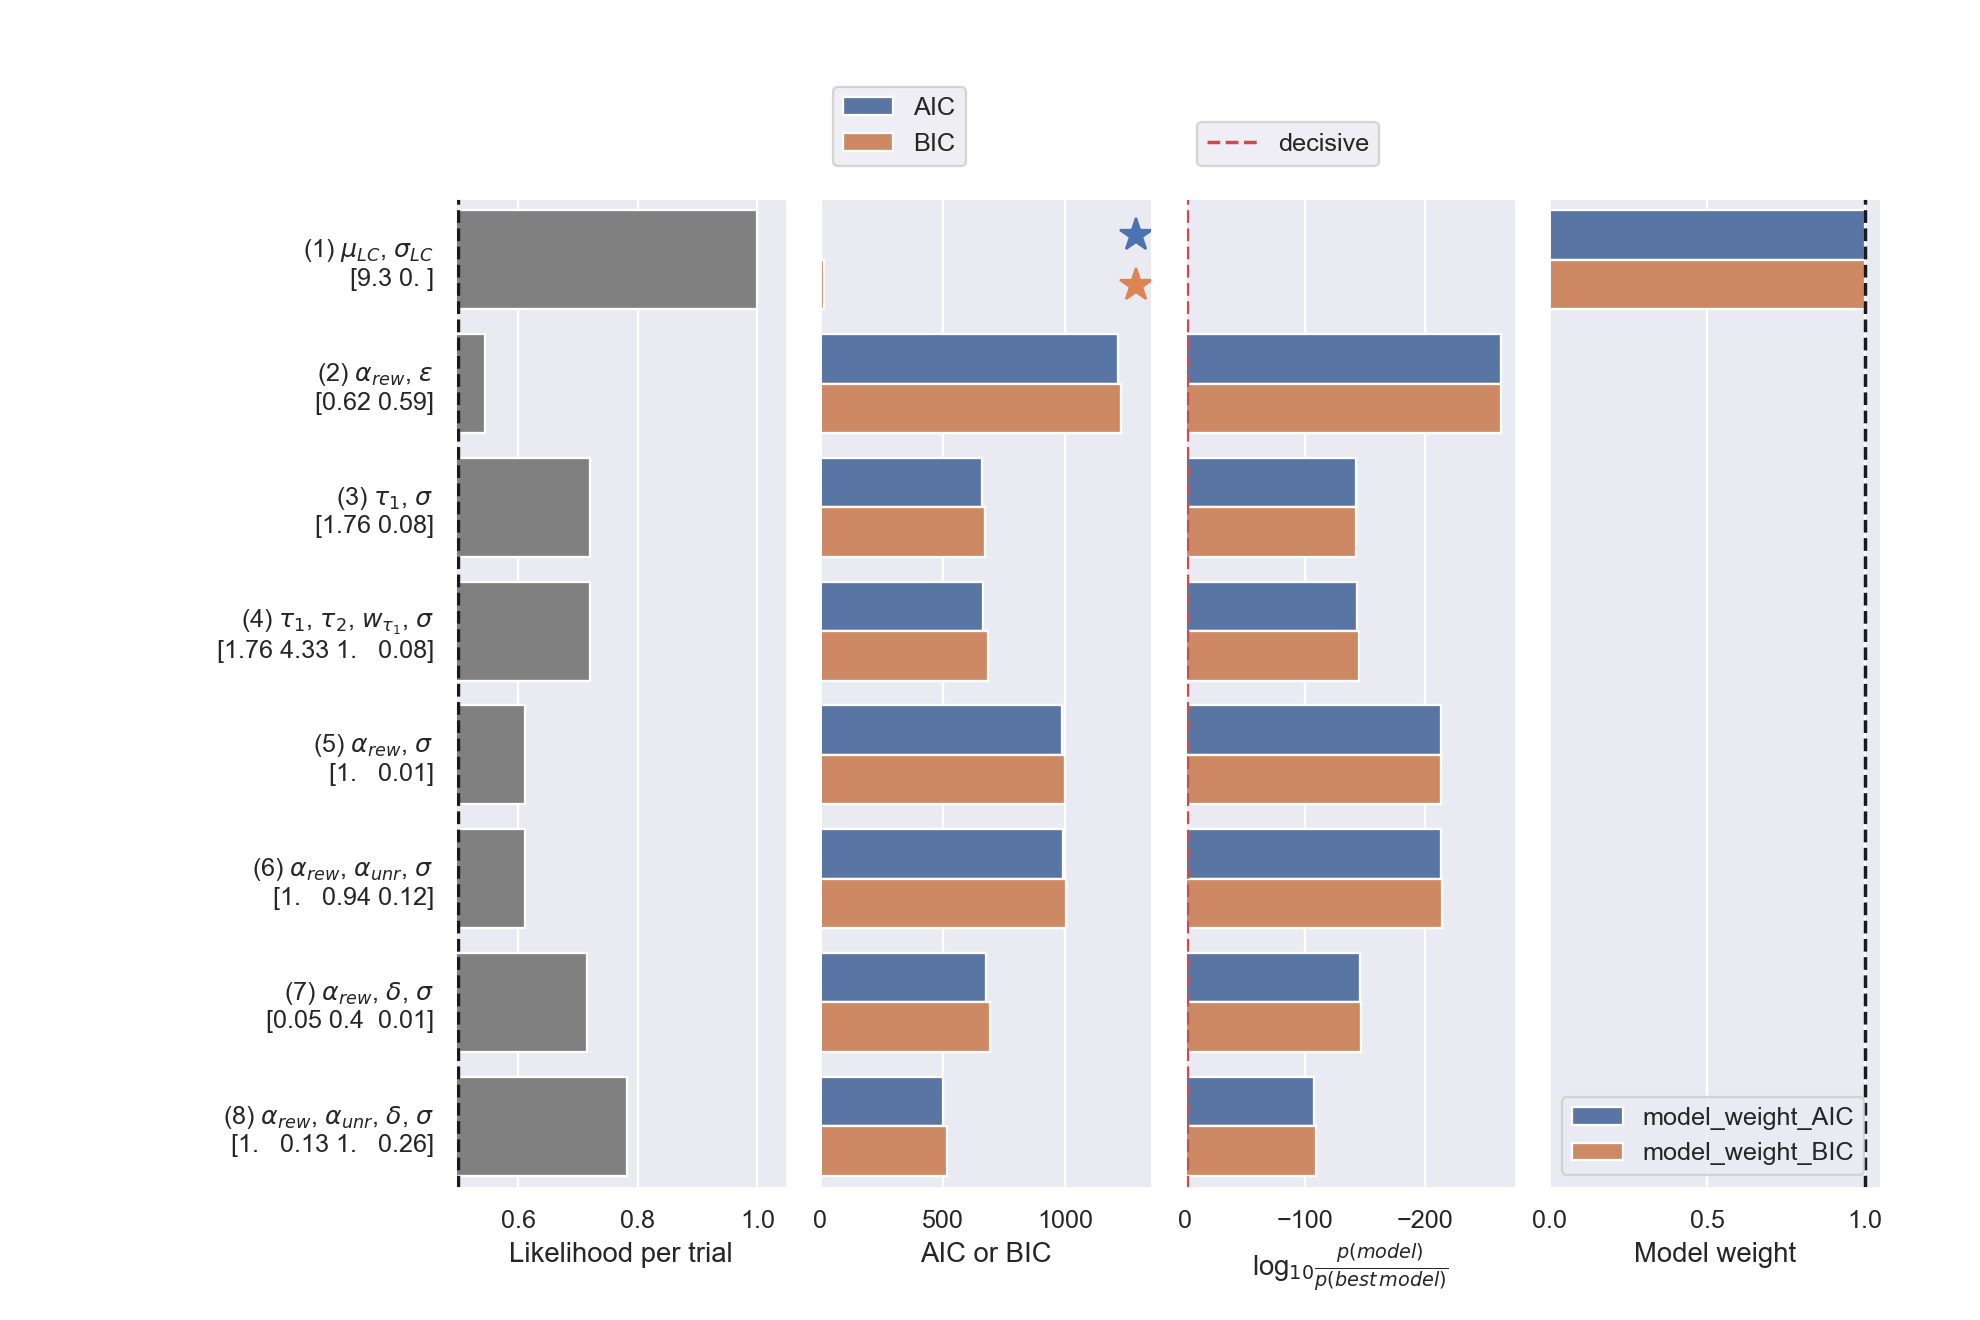

In [8]:
choice_history, reward_history, p_reward = generate_fake_data('LossCounting', ['loss_count_threshold_mean','loss_count_threshold_std'], [10,0])
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward, models = [1,2,3,4,5,6,7,8])
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

The right panel is log10([Bayes factor](https://en.wikipedia.org/wiki/Bayes_factor)), which is the relative likelihood of the $i$th model (using AIC as an example): <br>

\begin{equation}
Bayes\,factor = relative\,likelihood = \frac{p(data|model_i)}{p(data|best\, model)} = \frac{exp(E_{m,i})}{exp(E_{m,best})} = \frac{exp(-AIC_i/2)}{exp(-AIC_{min}/2)} = exp(-(AIC_i - AIC_{min})/2)
\end{equation}

If log10(Bayes factor) is smaller than -2, then the model comparison is considered "[decisive](https://en.wikipedia.org/wiki/Bayes_factor)" (the vertical red dashed line).<br>
Btw, AIC has been suggested [to be better](https://en.wikipedia.org/wiki/Akaike_information_criterion#Comparisons_with_other_model_selection_methods). Asymptotically, minimizing the [AIC is equivalent to minimizing the CV value in LOOCV](https://dzone.com/articles/why-every-statistician-should). This is true for any model (Stone 1977).

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/15:    LossCounting, Km = 2 ... AIC = 1335.24, BIC = 1345.06 (done in 5.08 secs)
Model 2/15:     RW1972_epsi, Km = 2 ... AIC = 1251.64, BIC = 1261.45 (done in 2.92 secs)
Model 3/15:     LNP_softmax, Km = 2 ... AIC = 1225.43, BIC = 1235.25 (done in 3.48 secs)
Model 4/15:     LNP_softmax, Km = 4 ... AIC = 1229.42, BIC = 1249.06 (done in 5.38 secs)
Model 5/15:  RW1972_softmax, Km = 2 ... AIC = 1204.57, BIC = 1214.39 (done in 2.91 secs)
Model 6/15:     Hattori2019, Km = 3 ... AIC = 1206.1, BIC = 1220.82 (done in 4.75 secs)
Model 7/15:        Bari2019, Km = 3 ... AIC = 1206.56, BIC = 1221.28 (done in 4.78 secs)
Model 8/15:     Hattori2019, Km = 4 ... AIC = 1208.1, BIC = 1227.73 (done in 5.81 secs)
Model 9/15:     RW1972_epsi, Km = 3 ... AIC = 1250.62, BIC = 1265.34 (done in 6.95 secs)
Model 10/15:     LNP_softmax, Km = 3 ... AIC = 1227.34, BIC = 1242.07 (done in 5.08 secs)
Model 11/15:     LNP_softmax, Km = 5 ..

<IPython.core.display.Javascript object>


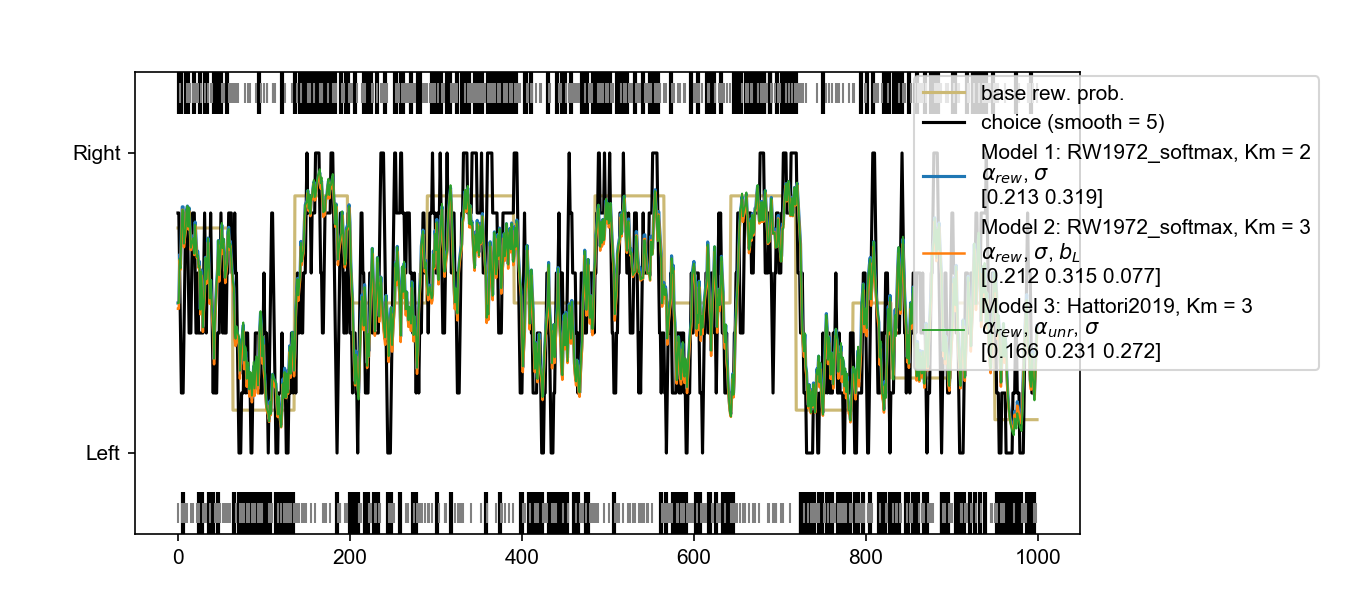

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
5   RW1972_softmax   2  1204.57         -0.00  1214.39         -0.00   
12  RW1972_softmax   3  1205.37         -0.17  1220.09         -1.24   
6      Hattori2019   3  1206.10         -0.33  1220.82         -1.40   
7         Bari2019   3  1206.56         -0.43  1221.28         -1.50   
13     Hattori2019   4  1207.18         -0.57  1226.81         -2.70   
14        Bari2019   4  1207.37         -0.61  1227.00         -2.74   
8      Hattori2019   4  1208.10         -0.77  1227.73         -2.90   
15     Hattori2019   5  1209.18         -1.00  1233.72         -4.20   
3      LNP_softmax   2  1225.43         -4.53  1235.25         -4.53   
10     LNP_softmax   3  1227.34         -4.95  1242.07         -6.01   
4      LNP_softmax   4  1229.42         -5.40  1249.06         -7.53   
11     LNP_softmax   5  1230.57         -5.65  1255.11         -8.84   
9      RW1972_epsi   3  1250.62        -10.00  1265.34        -11.06   
2      RW1972_epsi   2  1251.64        -10.22  1261.45        -10.22   
1     LossCounting   2  1335.24        -28.38  1345.06        -28.38   

                                                para_notation  \
5                                    $\alpha_{rew}$, $\sigma$   
12                            $\alpha_{rew}$, $\sigma$, $b_L$   
6                    $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
7                          $\alpha_{rew}$, $\delta$, $\sigma$   
13            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$   
14                  $\alpha_{rew}$, $\delta$, $\sigma$, $b_L$   
8          $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
15  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$   
3                                          $\tau_1$, $\sigma$   
10                                  $\tau_1$, $\sigma$, $b_L$   
4                  $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
11          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$   
9                           $\alpha_{rew}$, $\epsilon$, $b_L$   
2                                  $\alpha_{rew}$, $\epsilon$   
1                                   $\mu_{LC}$, $\sigma_{LC}$   

                            para_fitted  
5                        [0.213, 0.319]  
12                [0.212, 0.315, 0.077]  
6                 [0.166, 0.231, 0.272]  
7                 [0.212, 0.002, 0.317]  
13         [0.181, 0.223, 0.286, 0.069]  
14           [0.212, 0.0, 0.315, 0.077]  
8            [0.166, 0.231, 0.0, 0.272]  
15    [0.181, 0.223, 0.0, 0.286, 0.069]  
3                        [4.689, 0.311]  
10                 [4.698, 0.311, 0.02]  
4          [3.951, 4.898, 0.202, 0.311]  
11  [0.347, 5.296, 0.053, 0.308, 0.021]  
9                [0.176, 0.635, -0.001]  
2                        [0.155, 0.632]  
1                        [3.891, 9.383]

<IPython.core.display.Javascript object>


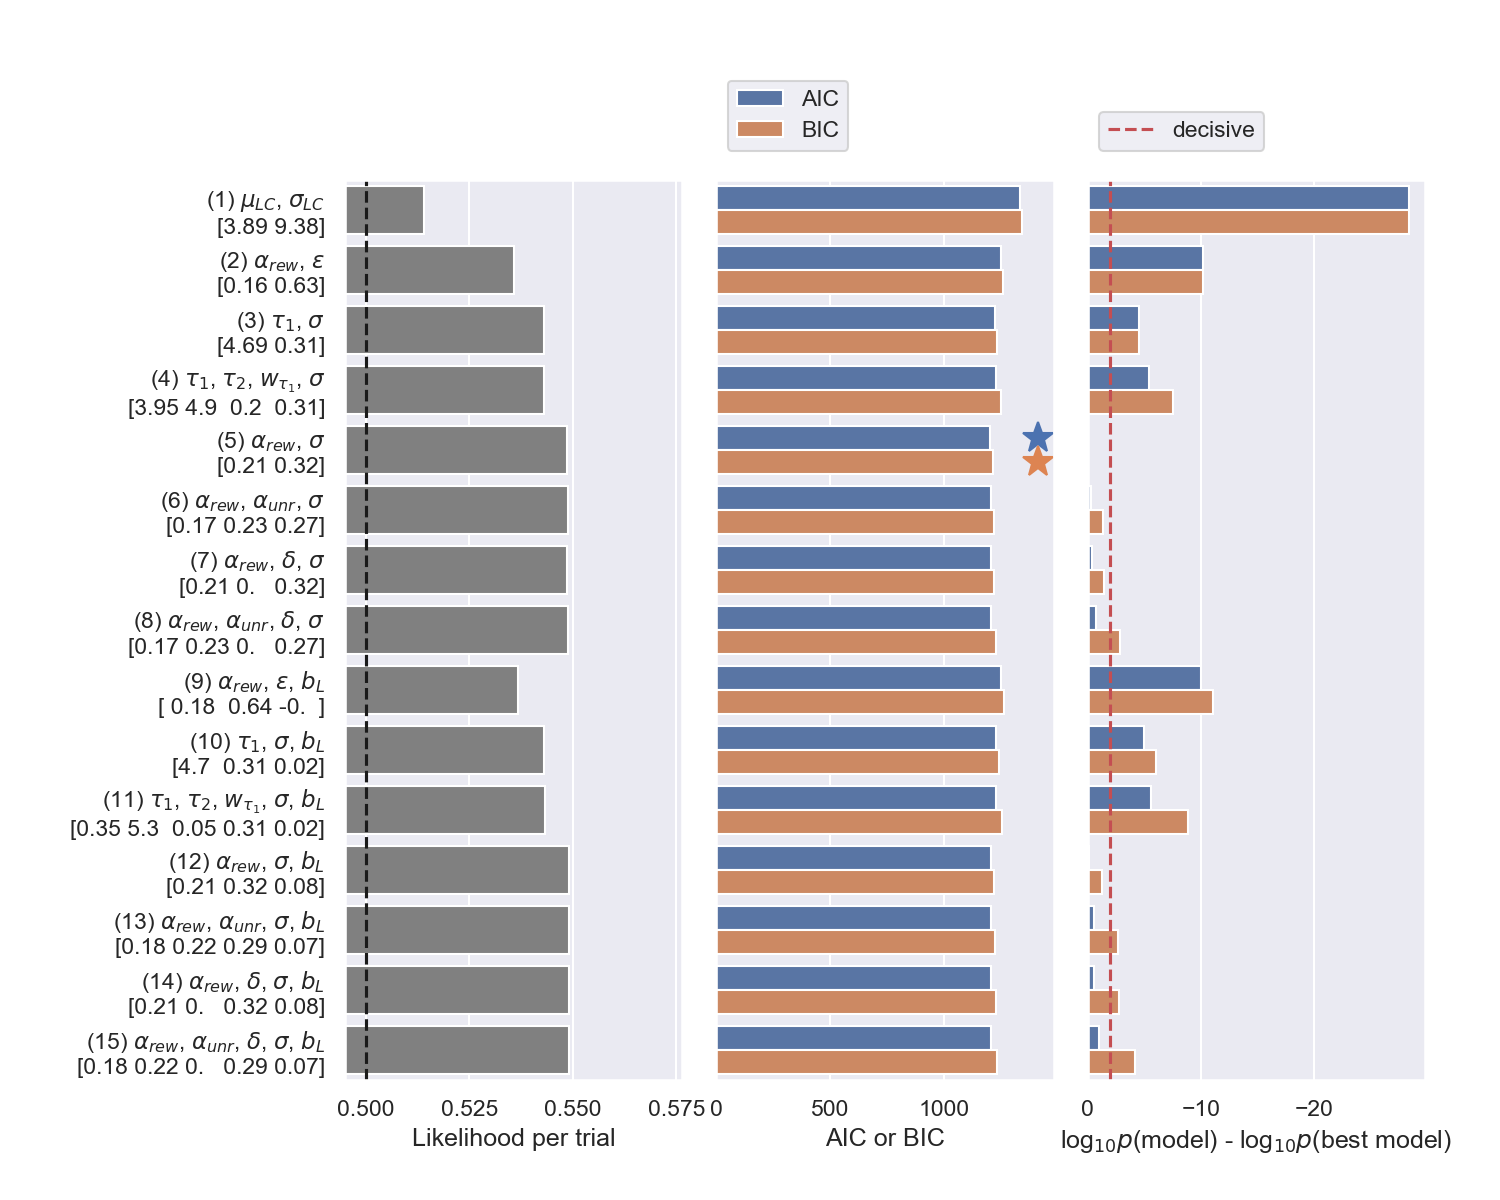

In [3]:
choice_history, reward_history, p_reward = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature'], [0.2,0.3])
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3]) # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1290.69, BIC = 1300.51 (done in 5.18 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1078.59, BIC = 1088.41 (done in 3.58 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 820.072, BIC = 829.887 (done in 3.76 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 822.053, BIC = 841.684 (done in 9.58 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 947.254, BIC = 957.069 (done in 3.72 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 949.13, BIC = 963.854 (done in 5.73 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 824.446, BIC = 839.169 (done in 8.76 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 822.101, BIC = 841.732 (done in 7.45 secs)


<IPython.core.display.Javascript object>


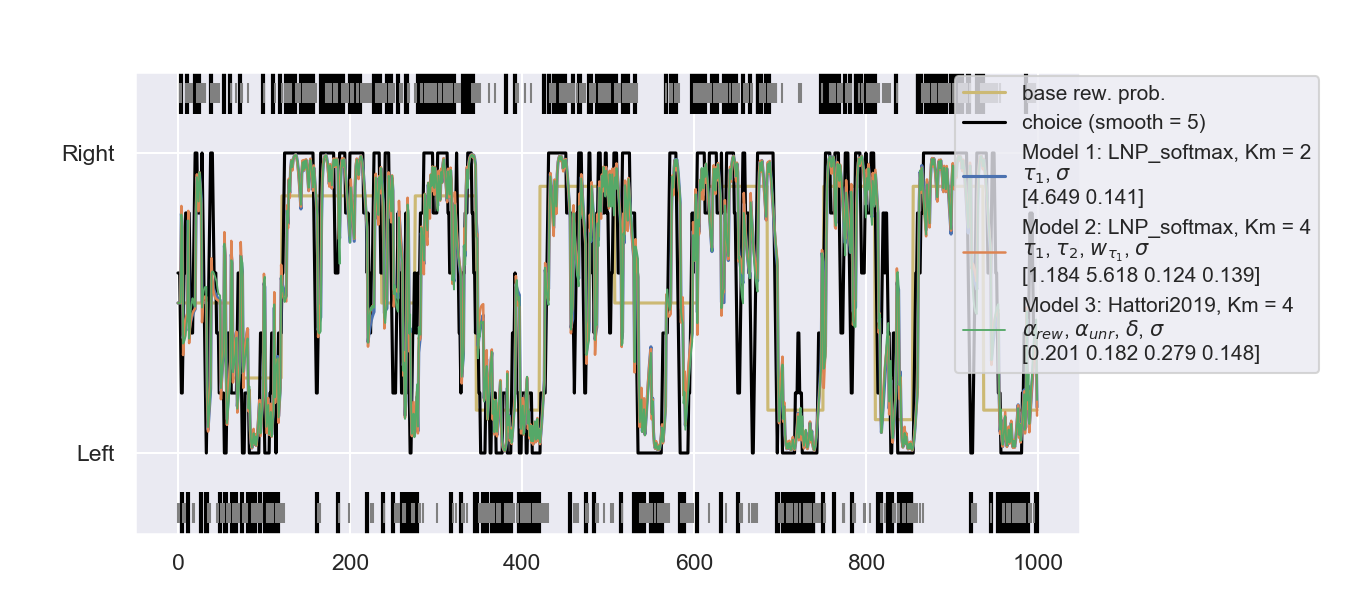

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
3     LNP_softmax   2   820.07         -0.00   829.89         -0.00   
4     LNP_softmax   4   822.05         -0.43   841.68         -2.56   
8     Hattori2019   4   822.10         -0.44   841.73         -2.57   
7        Bari2019   3   824.45         -0.95   839.17         -2.02   
5  RW1972_softmax   2   947.25        -27.62   957.07        -27.62   
6     Hattori2019   3   949.13        -28.02   963.85        -29.09   
2     RW1972_epsi   2  1078.59        -56.14  1088.41        -56.14   
1    LossCounting   2  1290.69       -102.19  1300.51       -102.19   

                                        para_notation  \
3                                  $\tau_1$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                    para_fitted  
3                [4.649, 0.141]  
4  [1.184, 5.618, 0.124, 0.139]  
8  [0.201, 0.182, 0.279, 0.148]  
7         [0.024, 0.156, 0.019]  
5                [0.138, 0.115]  
6          [0.12, 0.149, 0.104]  
2                [0.152, 0.452]  
1                [13.103, 10.0]

<IPython.core.display.Javascript object>


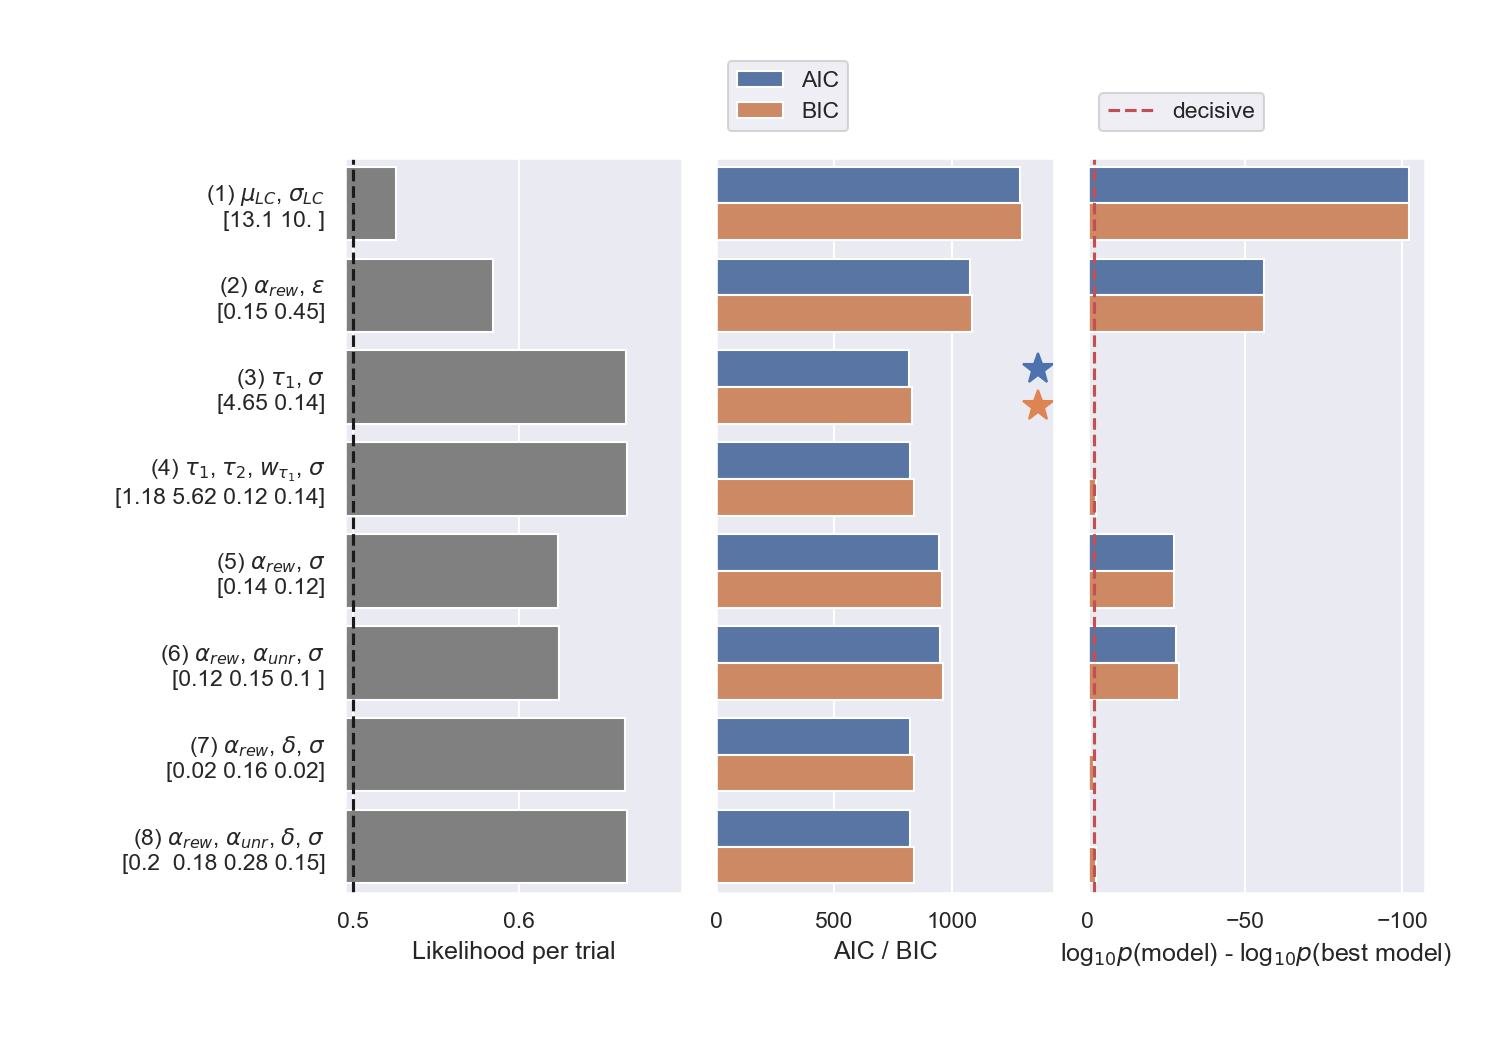

In [5]:
choice_history, reward_history, p_reward = generate_fake_data('Hattori2019', ['learn_rate_rew','learn_rate_unrew', 'forget_rate','softmax_temperature'], 
                                                      [0.4, 0.2, 0.2, 0.23], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

Try to fit the behavior of some special foragers

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1402.49, BIC = 1412.3 (done in 11.7 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1390.08, BIC = 1399.9 (done in 3.58 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 1388.94, BIC = 1398.75 (done in 2.24 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 1392.94, BIC = 1412.57 (done in 4.13 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1388.52, BIC = 1398.33 (done in 1.83 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 1389.22, BIC = 1403.94 (done in 3.26 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 1390.42, BIC = 1405.14 (done in 2.82 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1390.84, BIC = 1410.47 (done in 6.86 secs)


<IPython.core.display.Javascript object>


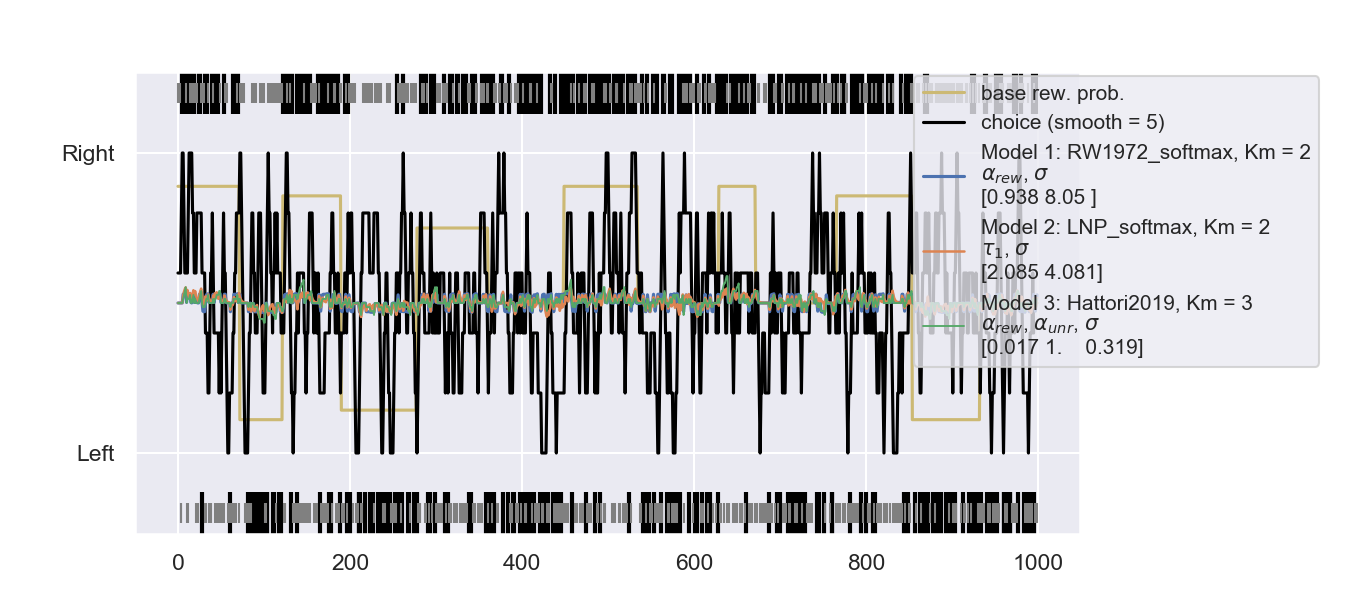

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
5  RW1972_softmax   2  1388.52         -0.00  1398.33         -0.00   
3     LNP_softmax   2  1388.94         -0.09  1398.75         -0.09   
6     Hattori2019   3  1389.22         -0.15  1403.94         -1.22   
2     RW1972_epsi   2  1390.08         -0.34  1399.90         -0.34   
7        Bari2019   3  1390.42         -0.41  1405.14         -1.48   
8     Hattori2019   4  1390.84         -0.50  1410.47         -2.64   
4     LNP_softmax   4  1392.94         -0.96  1412.57         -3.09   
1    LossCounting   2  1402.49         -3.03  1412.30         -3.03   

                                        para_notation  \
5                            $\alpha_{rew}$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                   para_fitted  
5                [0.938, 8.05]  
3               [2.085, 4.081]  
6          [0.017, 1.0, 0.319]  
2               [0.024, 0.992]  
7        [0.775, 0.126, 5.908]  
8     [0.007, 1.0, 0.0, 0.091]  
4  [2.085, 38.997, 1.0, 4.081]  
1                 [1.48, 10.0]

<IPython.core.display.Javascript object>


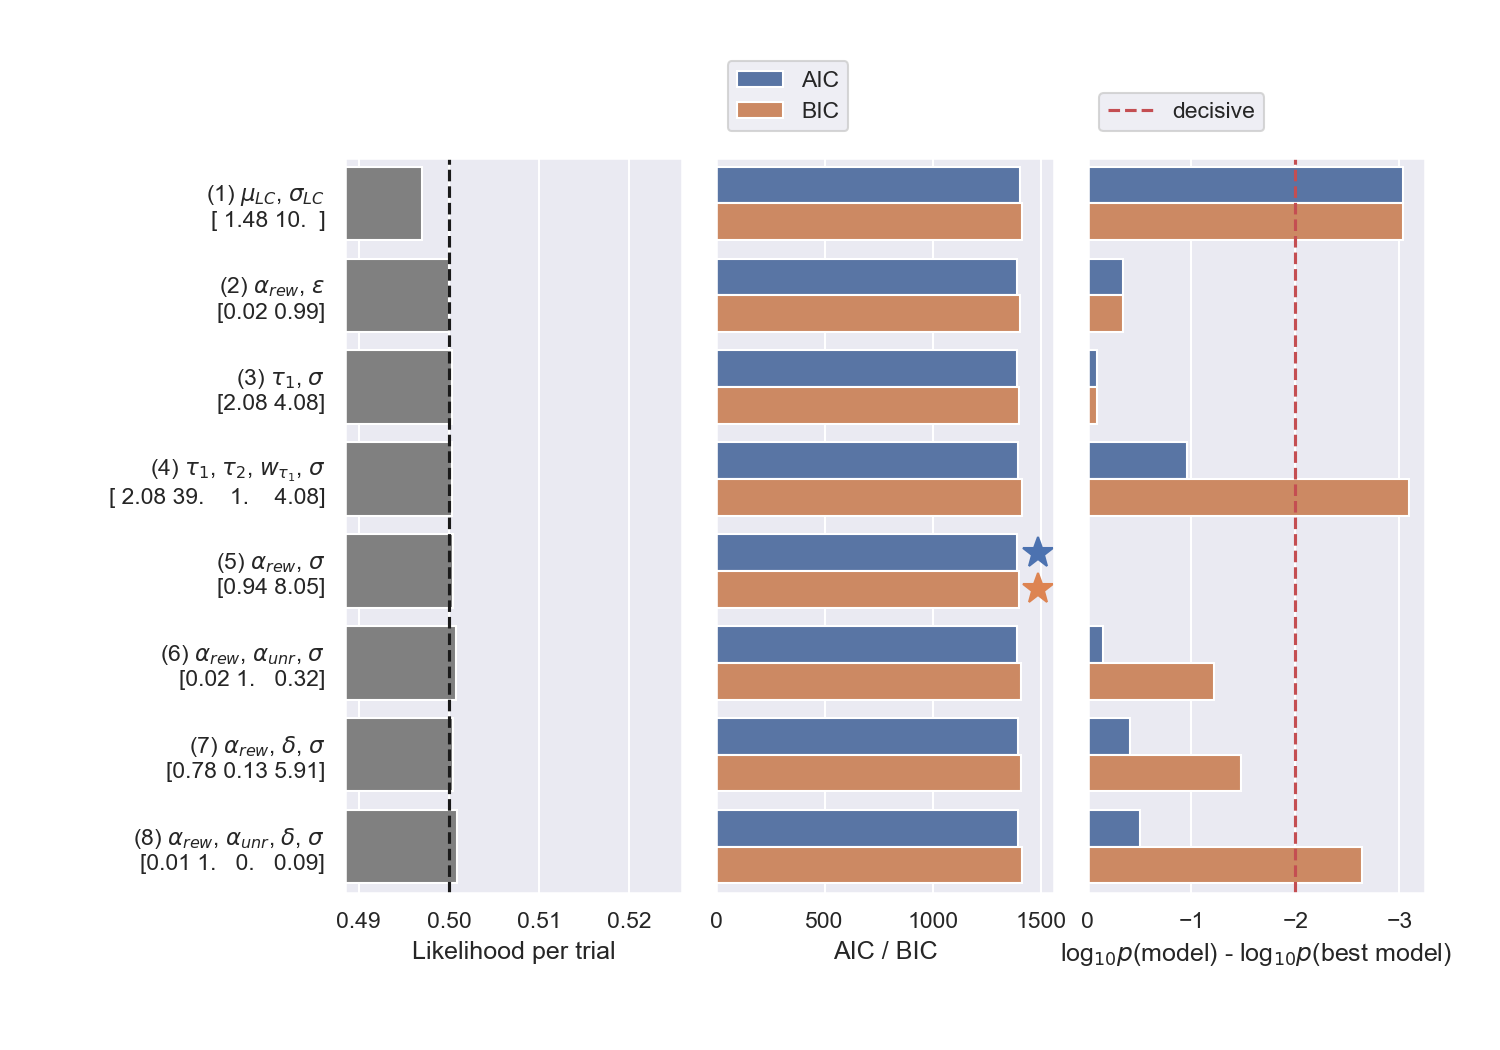

In [6]:
choice_history, reward_history, p_reward = generate_fake_data('Random', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

Note that these models cannot differentiate IdealpHatGreedy and pMatching.

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/15:    LossCounting, Km = 2 ... AIC = 1410.86, BIC = 1420.67 (done in 5.44 secs)
Model 2/15:     RW1972_epsi, Km = 2 ... AIC = 1390.31, BIC = 1400.13 (done in 4.52 secs)
Model 3/15:     LNP_softmax, Km = 2 ... AIC = 1241.71, BIC = 1251.52 (done in 4.15 secs)
Model 4/15:     LNP_softmax, Km = 4 ... AIC = 1245.71, BIC = 1265.34 (done in 5.93 secs)
Model 5/15:  RW1972_softmax, Km = 2 ... AIC = 1389.99, BIC = 1399.8 (done in 1.59 secs)
Model 6/15:     Hattori2019, Km = 3 ... AIC = 1391.72, BIC = 1406.44 (done in 2.85 secs)
Model 7/15:        Bari2019, Km = 3 ... AIC = 1246.99, BIC = 1261.71 (done in 7.62 secs)
Model 8/15:     Hattori2019, Km = 4 ... AIC = 1192.66, BIC = 1212.29 (done in 7.14 secs)
Model 9/15:     RW1972_epsi, Km = 3 ... AIC = 1391.84, BIC = 1406.57 (done in 5.56 secs)
Model 10/15:     LNP_softmax, Km = 3 ... AIC = 1243.71, BIC = 1258.43 (done in 6.89 secs)
Model 11/15:     LNP_softmax, Km = 5 .

<IPython.core.display.Javascript object>


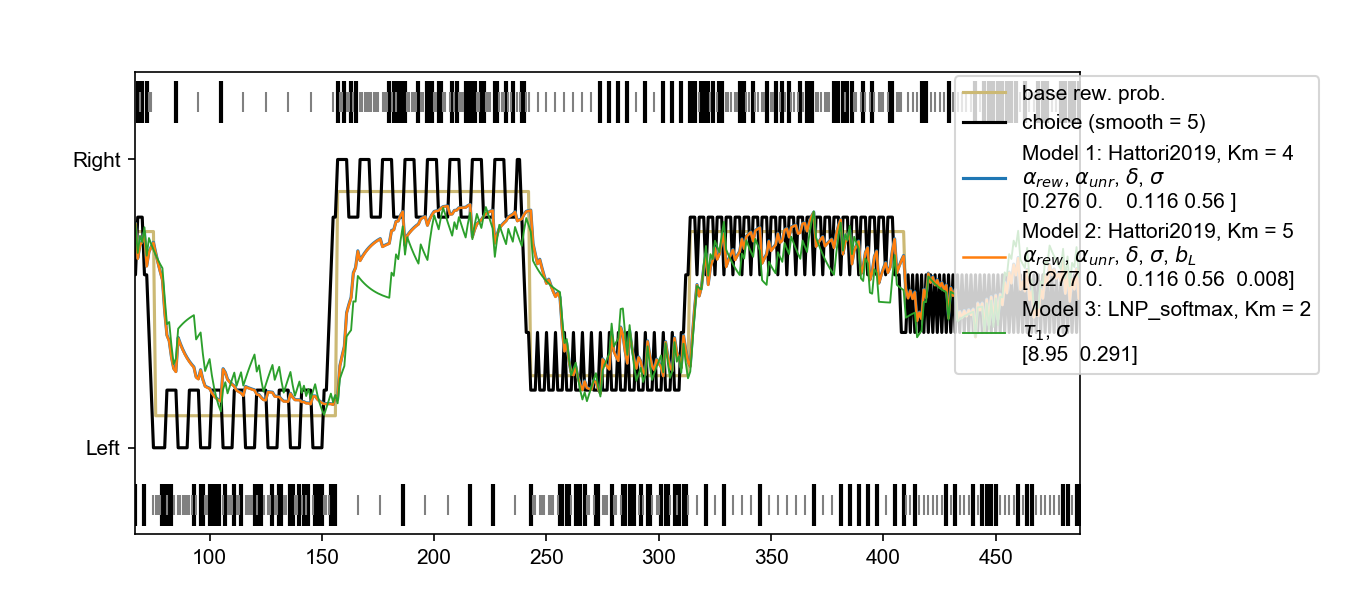

model  Km      AIC  log10_BF_AIC  model_weight_AIC      BIC  \
8      Hattori2019   4  1192.66         -0.00              0.73  1212.29   
15     Hattori2019   5  1194.65         -0.43              0.27  1219.19   
3      LNP_softmax   2  1241.71        -10.65              0.00  1251.52   
10     LNP_softmax   3  1243.71        -11.08              0.00  1258.43   
4      LNP_softmax   4  1245.71        -11.52              0.00  1265.34   
7         Bari2019   3  1246.99        -11.80              0.00  1261.71   
14        Bari2019   4  1247.04        -11.81              0.00  1266.67   
11     LNP_softmax   5  1247.71        -11.95              0.00  1272.24   
5   RW1972_softmax   2  1389.99        -42.85              0.00  1399.80   
2      RW1972_epsi   2  1390.31        -42.92              0.00  1400.13   
12  RW1972_softmax   3  1391.26        -43.12              0.00  1405.98   
6      Hattori2019   3  1391.72        -43.22              0.00  1406.44   
9      RW1972_epsi   3  1391.84        -43.25              0.00  1406.57   
13     Hattori2019   4  1393.03        -43.51              0.00  1412.66   
1     LossCounting   2  1410.86        -47.38              0.00  1420.67   

    log10_BF_BIC  model_weight_BIC  \
8          -0.00              0.97   
15         -1.50              0.03   
3          -8.52              0.00   
10        -10.02              0.00   
4         -11.52              0.00   
7         -10.73              0.00   
14        -11.81              0.00   
11        -13.02              0.00   
5         -40.72              0.00   
2         -40.79              0.00   
12        -42.06              0.00   
6         -42.16              0.00   
9         -42.19              0.00   
13        -43.51              0.00   
1         -45.25              0.00   

                                                para_notation  \
8          $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
15  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$   
3                                          $\tau_1$, $\sigma$   
10                                  $\tau_1$, $\sigma$, $b_L$   
4                  $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
7                          $\alpha_{rew}$, $\delta$, $\sigma$   
14                  $\alpha_{rew}$, $\delta$, $\sigma$, $b_L$   
11          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$   
5                                    $\alpha_{rew}$, $\sigma$   
2                                  $\alpha_{rew}$, $\epsilon$   
12                            $\alpha_{rew}$, $\sigma$, $b_L$   
6                    $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
9                           $\alpha_{rew}$, $\epsilon$, $b_L$   
13            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$   
1                                   $\mu_{LC}$, $\sigma_{LC}$   

                         para_fitted  
8          [0.276, 0.0, 0.116, 0.56]  
15  [0.277, 0.0, 0.116, 0.56, 0.008]  
3                      [8.95, 0.291]  
10                [8.95, 0.291, 0.0]  
4           [8.95, 10.9, 1.0, 0.291]  
7              [0.008, 0.109, 0.022]  
14        [0.004, 0.104, 0.01, -0.0]  
11   [8.95, 15.801, 1.0, 0.291, 0.0]  
5                       [0.99, 15.0]  
2                     [0.502, 0.999]  
12             [0.982, 15.0, -0.054]  
6                [0.214, 1.0, 5.515]  
9              [0.592, 0.993, -0.02]  
13        [0.25, 1.0, 6.769, -0.053]  
1                      [2.791, 10.0]

<IPython.core.display.Javascript object>


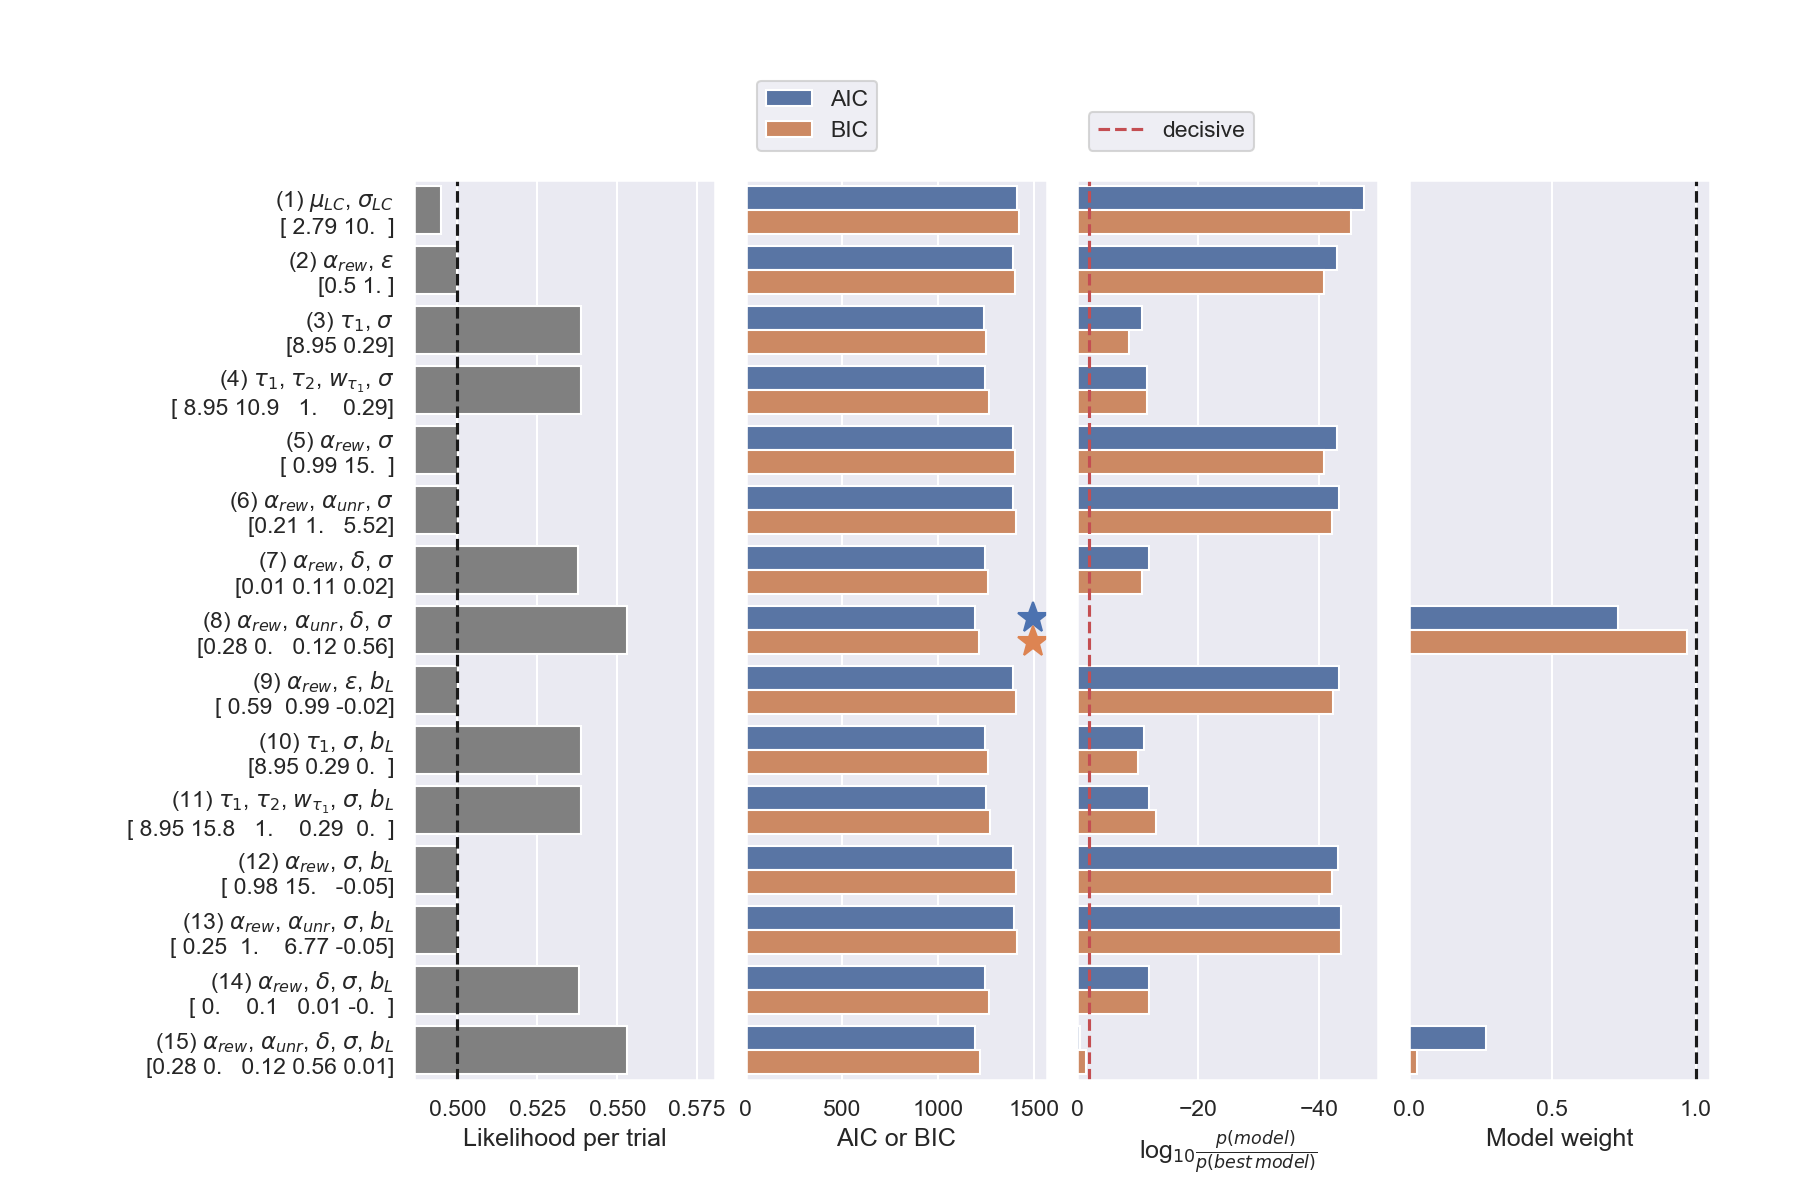

In [3]:
choice_history, reward_history, p_reward = generate_fake_data('IdealpHatGreedy', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward, models = [
            # No bias (1-8)
            ['LossCounting', ['loss_count_threshold_mean', 'loss_count_threshold_std'], [0,0], [40,10]],                   
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon'],[0, 0],[1, 1]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature'], [1e-3, 1e-2], [100, 15]],                 
            ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature'],[1e-3, 1e-1, 0, 1e-2],[15, 40, 1, 15]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature'],[0, 1e-2],[1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature'],[0, -1, 1e-2],[1, 1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature'],[0, 0, -1, 1e-2],[1, 1, 1, 15]],
            
            # With bias (9-15)
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon', 'biasL'],[0, 0, -0.5],[1, 1, 0.5]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature', 'biasL'], [1e-3, 1e-2, -5], [100, 15, 5]],                 
            ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature', 'biasL'],[1e-3, 1e-1, 0, 1e-2, -5],[15, 40, 1, 15, 5]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature', 'biasL'],[0, 1e-2, -5],[1, 15, 5]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature', 'biasL'],[0, 0, 1e-2, -5],[1, 1, 15, 5]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature', 'biasL'],[0, -1, 1e-2, -5],[1, 1, 15, 5]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature', 'biasL'],[0, 0, -1, 1e-2, -5],[1, 1, 1, 15, 5]],
         ]
)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1378.93, BIC = 1388.75 (done in 5.27 secs)
Model 2/8:     RW1972_epsi, Km = 2 ... AIC = 1246.02, BIC = 1255.84 (done in 4.15 secs)
Model 3/8:     LNP_softmax, Km = 2 ... AIC = 1046.68, BIC = 1056.49 (done in 3.77 secs)
Model 4/8:     LNP_softmax, Km = 4 ... AIC = 1050.68, BIC = 1070.31 (done in 7.09 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1232.33, BIC = 1242.15 (done in 3.89 secs)
Model 6/8:     Hattori2019, Km = 3 ... AIC = 1229.4, BIC = 1244.12 (done in 4.76 secs)
Model 7/8:        Bari2019, Km = 3 ... AIC = 1050.32, BIC = 1065.04 (done in 9.44 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1017.16, BIC = 1036.79 (done in 6.95 secs)


<IPython.core.display.Javascript object>


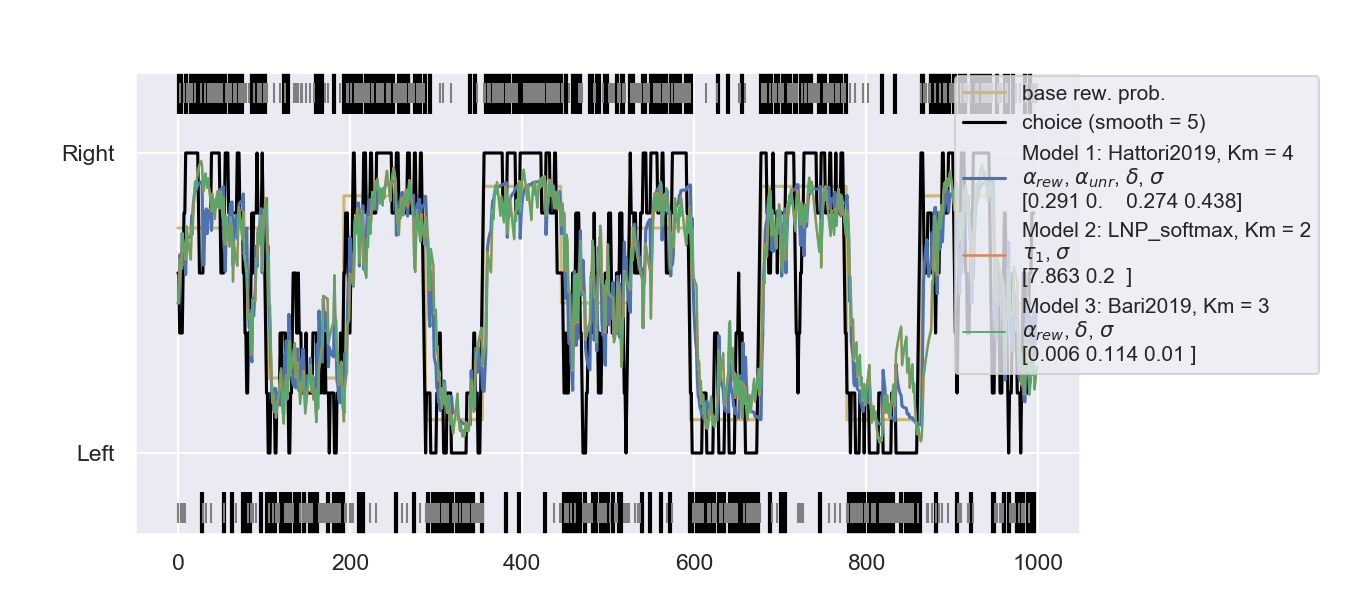

model  Km      AIC  log10_BF_AIC      BIC  log10_BF_BIC  \
8     Hattori2019   4  1017.16         -0.00  1036.79         -0.00   
3     LNP_softmax   2  1046.68         -6.41  1056.49         -4.28   
7        Bari2019   3  1050.32         -7.20  1065.04         -6.13   
4     LNP_softmax   4  1050.68         -7.28  1070.31         -7.28   
6     Hattori2019   3  1229.40        -46.09  1244.12        -45.02   
5  RW1972_softmax   2  1232.33        -46.72  1242.15        -44.59   
2     RW1972_epsi   2  1246.02        -49.70  1255.84        -47.57   
1    LossCounting   2  1378.93        -78.56  1388.75        -76.43   

                                        para_notation  \
8  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
3                                  $\tau_1$, $\sigma$   
7                  $\alpha_{rew}$, $\delta$, $\sigma$   
4          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
6            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
5                            $\alpha_{rew}$, $\sigma$   
2                          $\alpha_{rew}$, $\epsilon$   
1                           $\mu_{LC}$, $\sigma_{LC}$   

                  para_fitted  
8  [0.291, 0.0, 0.274, 0.438]  
3                [7.863, 0.2]  
7        [0.006, 0.114, 0.01]  
4   [7.863, 11.154, 1.0, 0.2]  
6       [0.006, 0.079, 0.021]  
5              [0.058, 0.131]  
2              [0.056, 0.625]  
1               [8.921, 10.0]

<IPython.core.display.Javascript object>


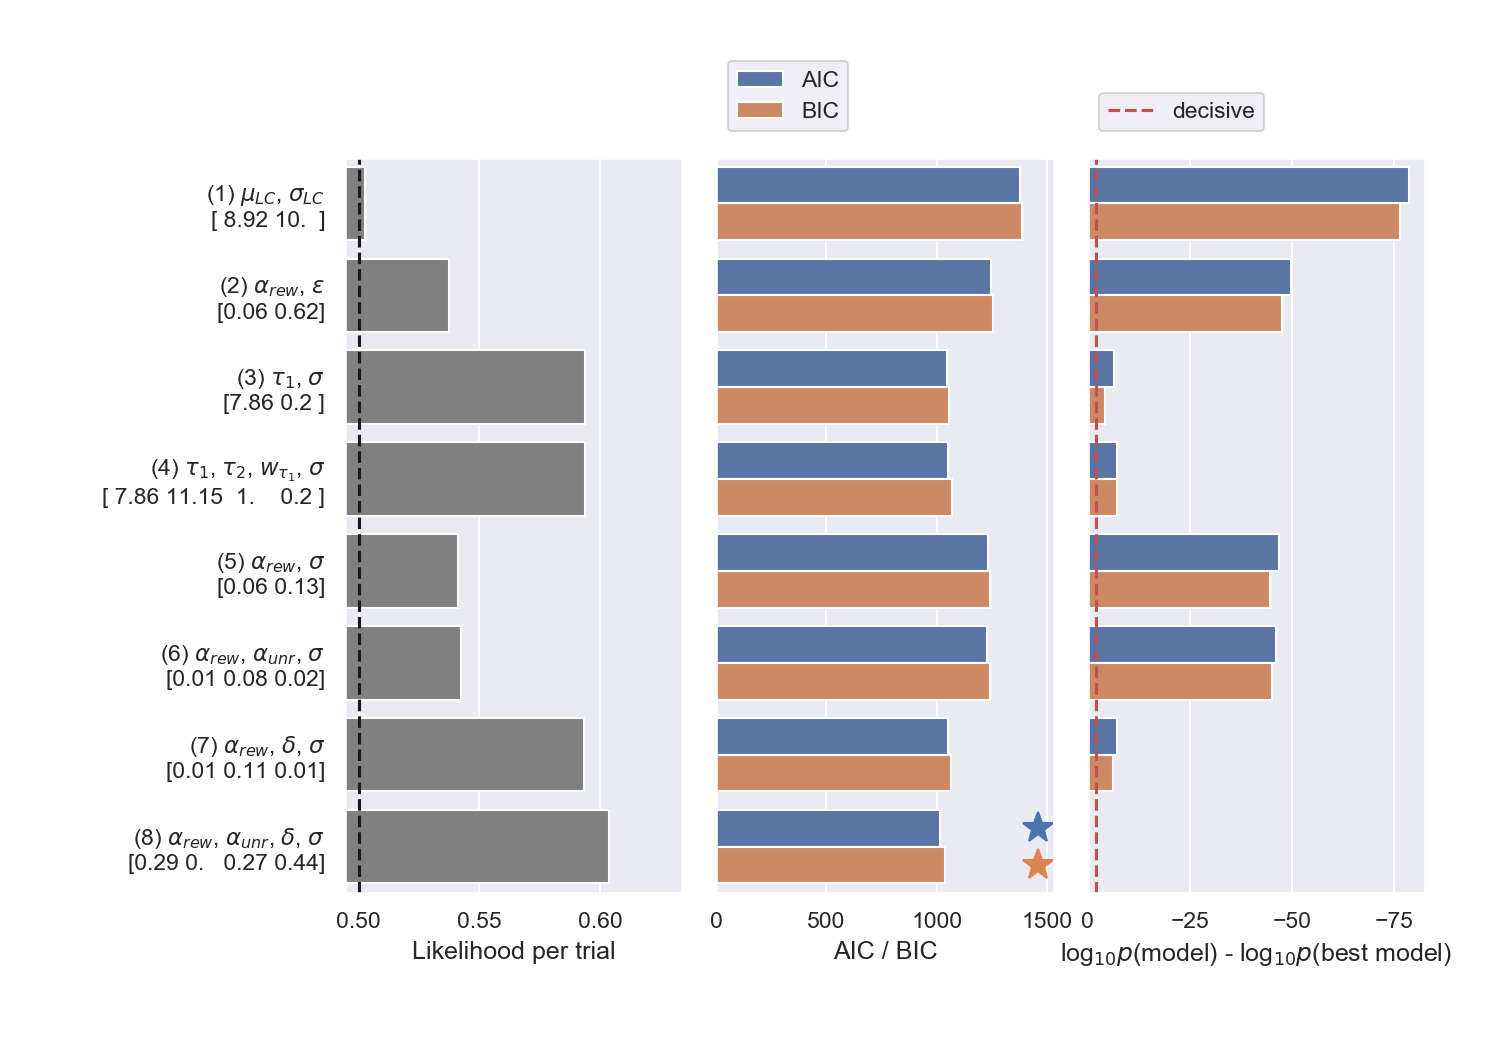

In [8]:
choice_history, reward_history, p_reward = generate_fake_data('pMatching', [],[], n_trials = 1000)  # Almost Hattori et al.
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3])  # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

# Confusion matrix and Inversion matrix

## Default settings

The range for generating parameters:

```python
def generate_random_para(para_name):
    # With slightly narrower range than fitting bounds in BanditModelComparison
    if para_name in 'loss_count_threshold_mean':
        return np.random.uniform(0, 30)
    elif para_name in 'loss_count_threshold_std':
        return np.random.uniform(0, 5)
    elif para_name in ['tau1', 'tau2']:
        return 10**np.random.uniform(0, np.log10(30)) 
    elif para_name in ['w_tau1', 'learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'epsilon']:
        return np.random.uniform(0, 1)
    elif para_name in 'softmax_temperature':
        return 1/np.random.exponential(10)
```

<font size=3>Don't try to rerun this... It took 9.5 hours!

In [6]:
models = [
            ['LossCounting', ['loss_count_threshold_mean', 'loss_count_threshold_std'], [0,0], [40,10]],                   
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon'],[0, 0],[1, 1]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature'], [1e-3, 1e-2], [100, 15]],                 
            ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature'],[1e-3, 1e-1, 0, 1e-2],[15, 40, 1, 15]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature'],[0, 1e-2],[1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature'],[0, 0, 0, 1e-2],[1, 1, 1, 15]],
         ]

compute_confusion_matrix(models = models, n_runs = 100, n_trials = 1000, pool = pool)

Runs: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [9:32:03<00:00, 343.23s/it]


Load results and plot

<IPython.core.display.Javascript object>


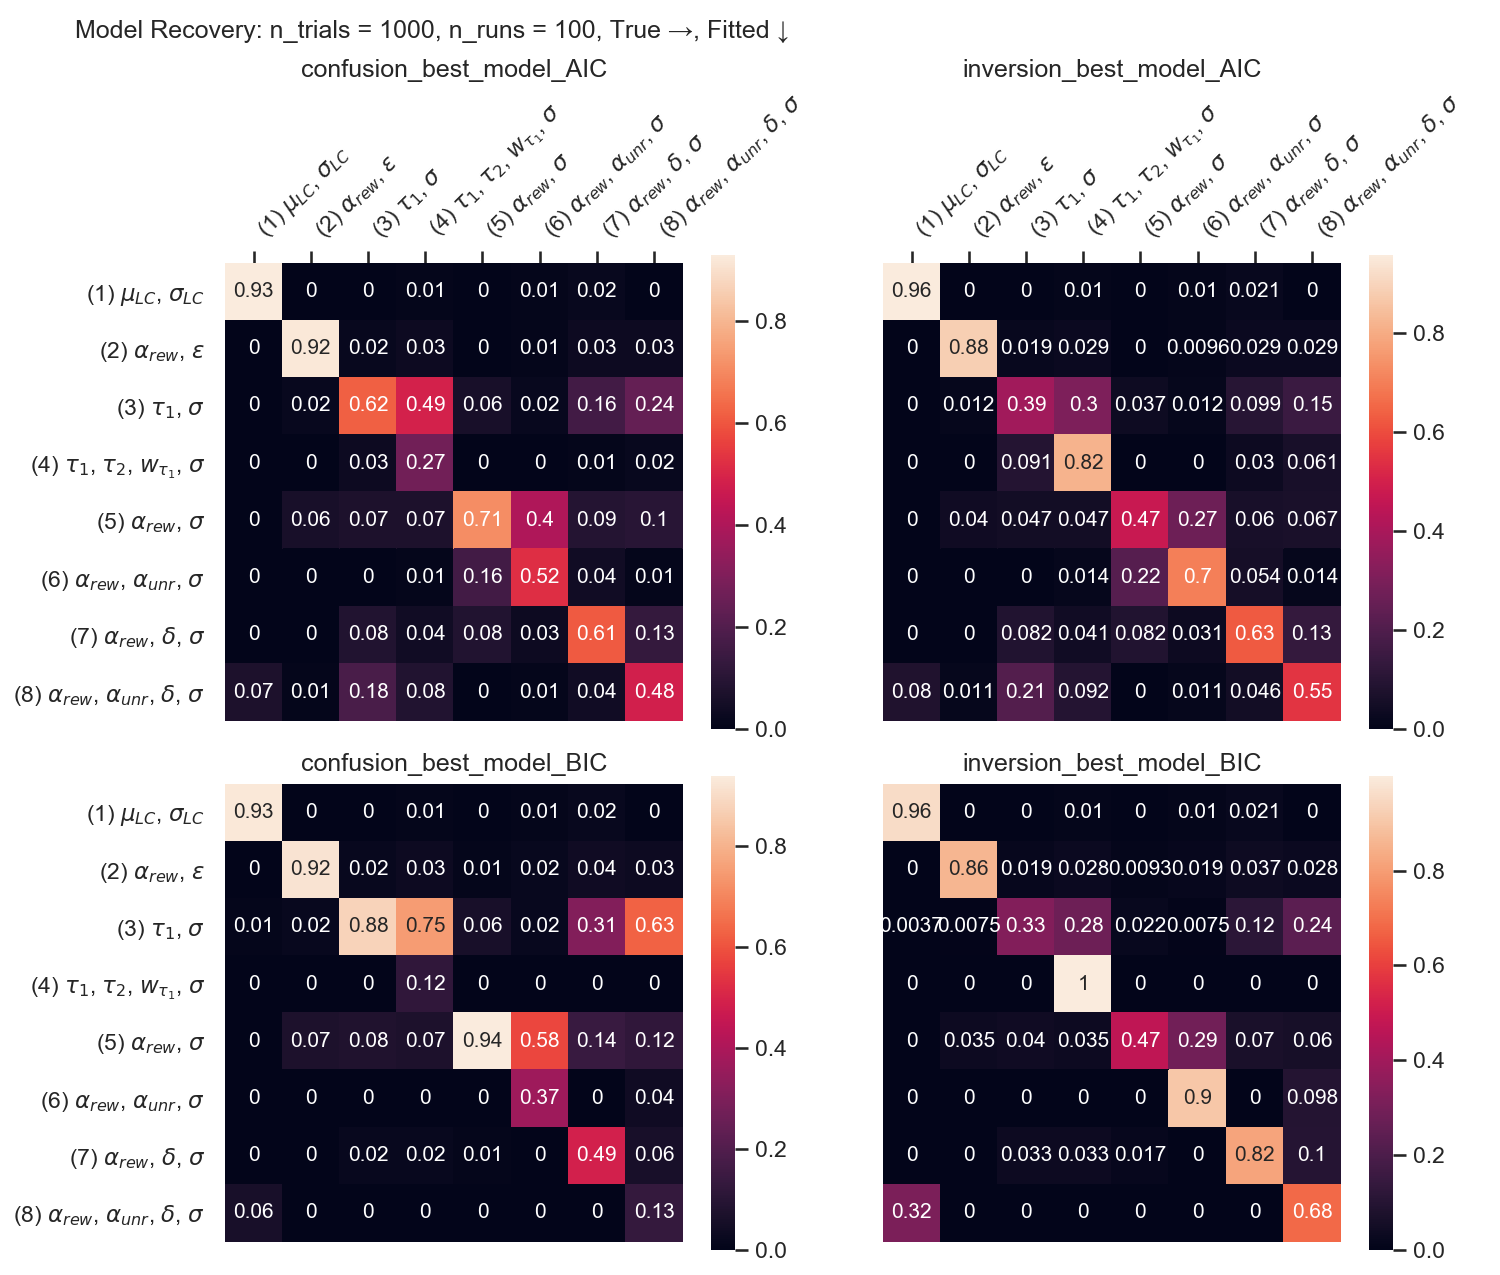

<IPython.core.display.Javascript object>


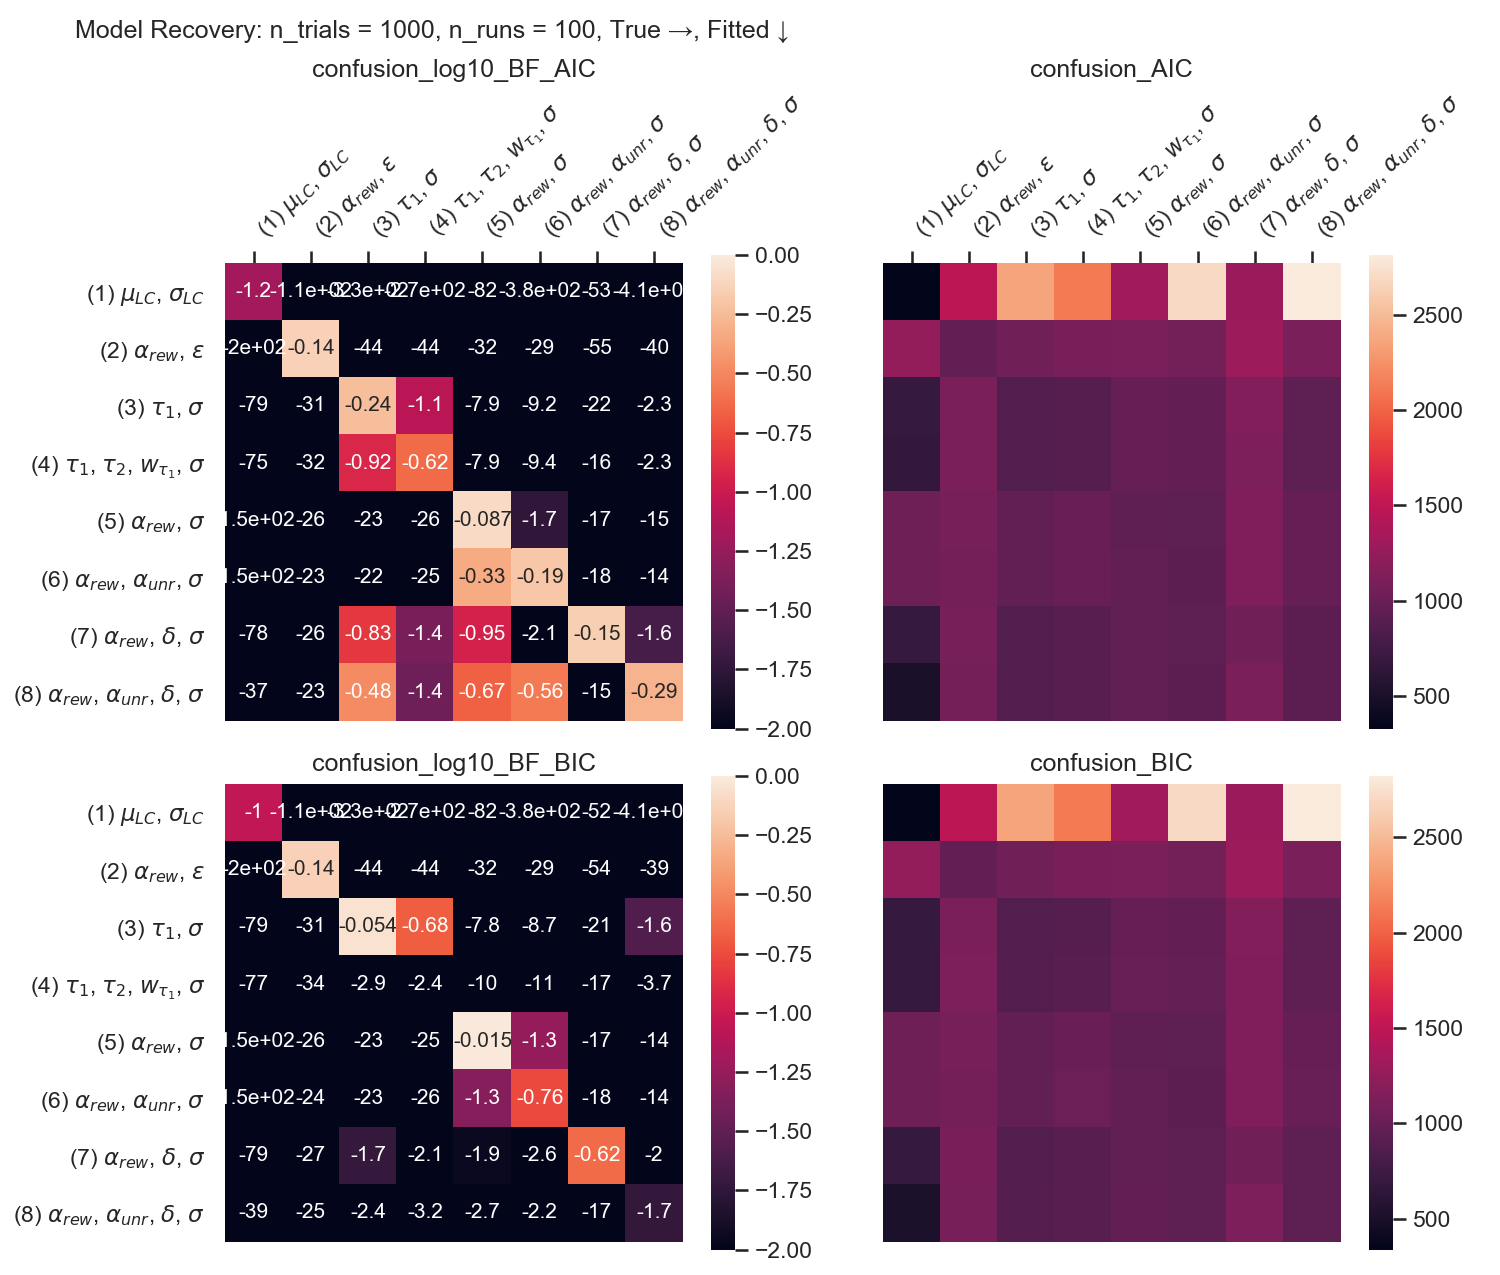

In [12]:
from plot_fitting import plot_confusion_matrix
confusion_results = pickle.load(open(".\\results\\confusion_results_1_100_1000.p", "rb"))
plot_confusion_matrix(confusion_results, order = [1,4,2,3,5,7,6,8])

Finally we got this! As expected, AIC looks better. <br>

1. The crosstalk between models are highly correlated with their similarities:

- [4,3]: When $\tau_1=\tau_2$, model (4) --> (3)
- [6,5] and [8,7]: When $\alpha_{unr} = \alpha_{rew}$, model (6) --> (5), model (8) --> (7)
- [7,3] and [8,3]: When $\delta = \alpha$, RL-like --> local INCOME in LNP!


2.  The model (3) $\tau_1, \sigma$ (Sugrue 2004) is the most versatile one. Because it's simple.
3.  Compare (3) and (5) --> INCOME and RETURN are different. 
4.  Compare (2) and (5) --> $\epsilon$ and $\sigma$ are different.

## Fewer trial numbers

I wanted to increase the trial number, but too slow. So try fewer trials...

In [7]:
models = [
            ['LossCounting', ['loss_count_threshold_mean', 'loss_count_threshold_std'], [0,0], [40,10]],                   
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon'],[0, 0],[1, 1]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature'], [1e-3, 1e-2], [100, 15]],                 
            ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature'],[1e-3, 1e-1, 0, 1e-2],[15, 40, 1, 15]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature'],[0, 1e-2],[1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature'],[0, 0, 0, 1e-2],[1, 1, 1, 15]],
         ]

compute_confusion_matrix(models = models, n_runs = 50, n_trials = 500, pool = pool, save_file = 'confusion_results_2_50_500.p')

Runs: 100%|█████████████████████████████████████████████████████████████████████████| 50/50 [2:58:58<00:00, 214.76s/it]


<IPython.core.display.Javascript object>


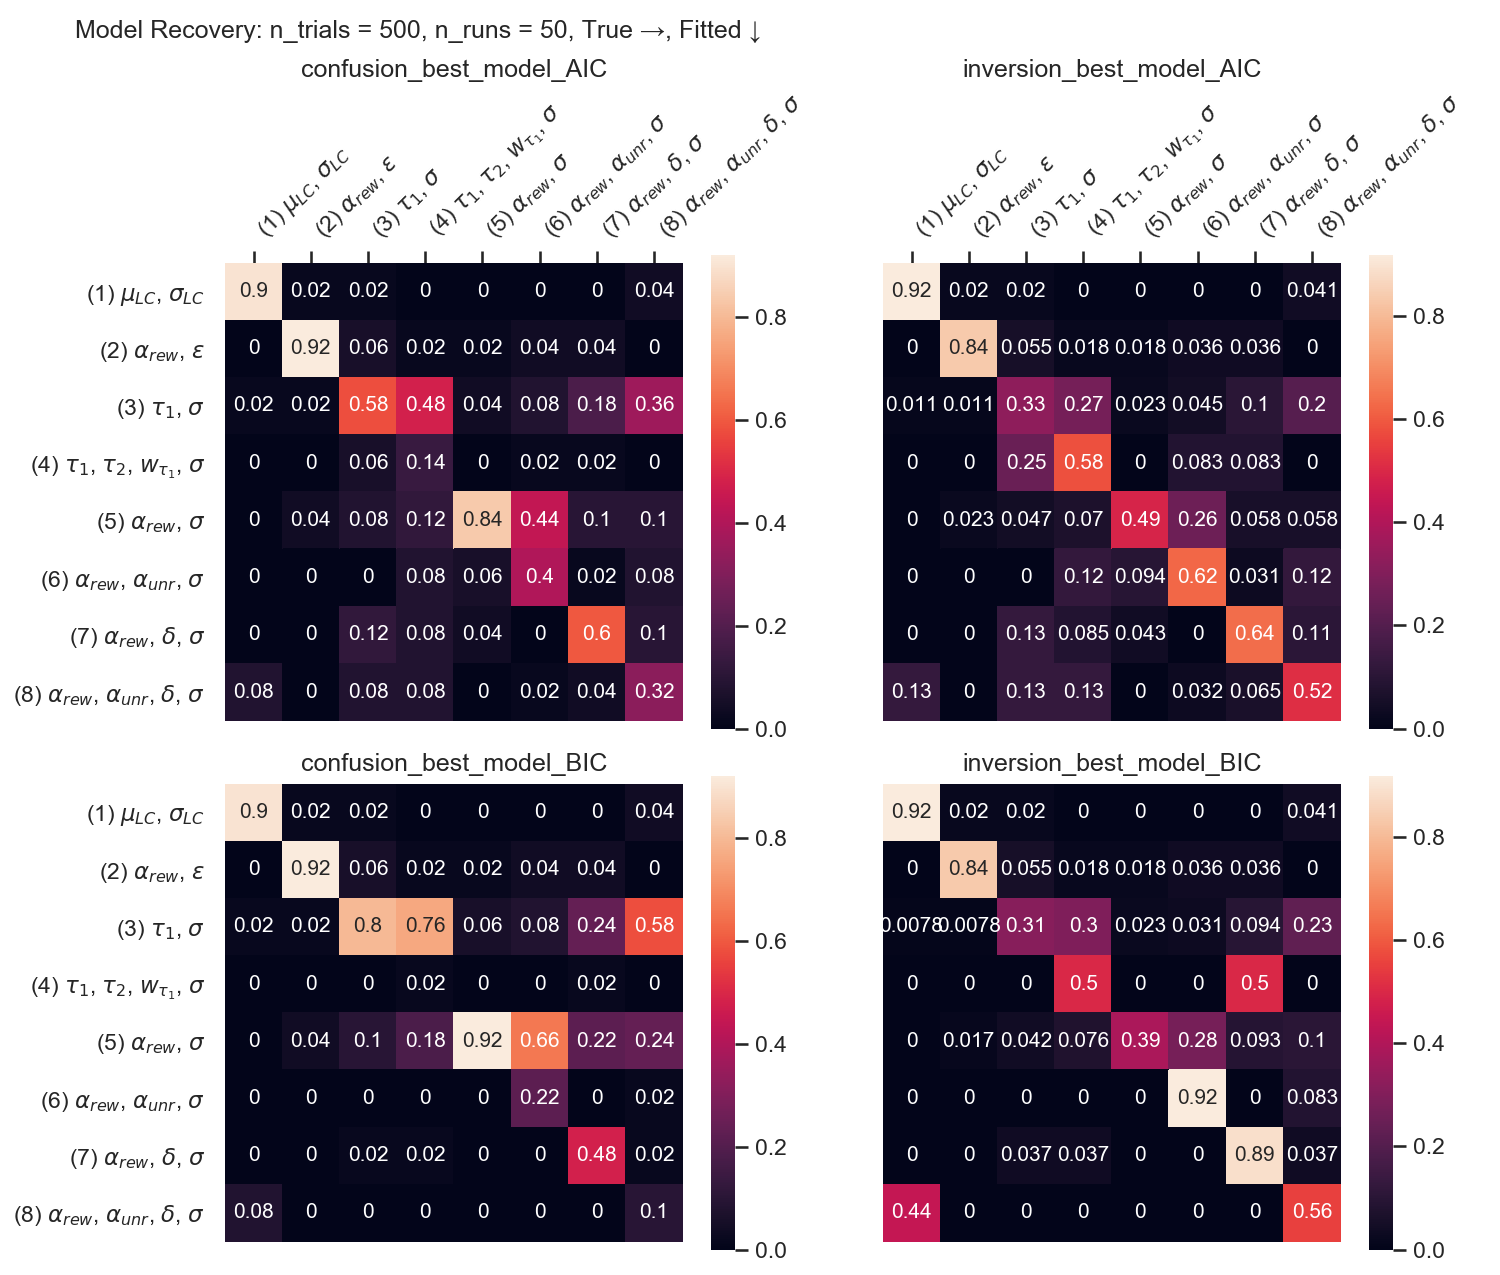

<IPython.core.display.Javascript object>


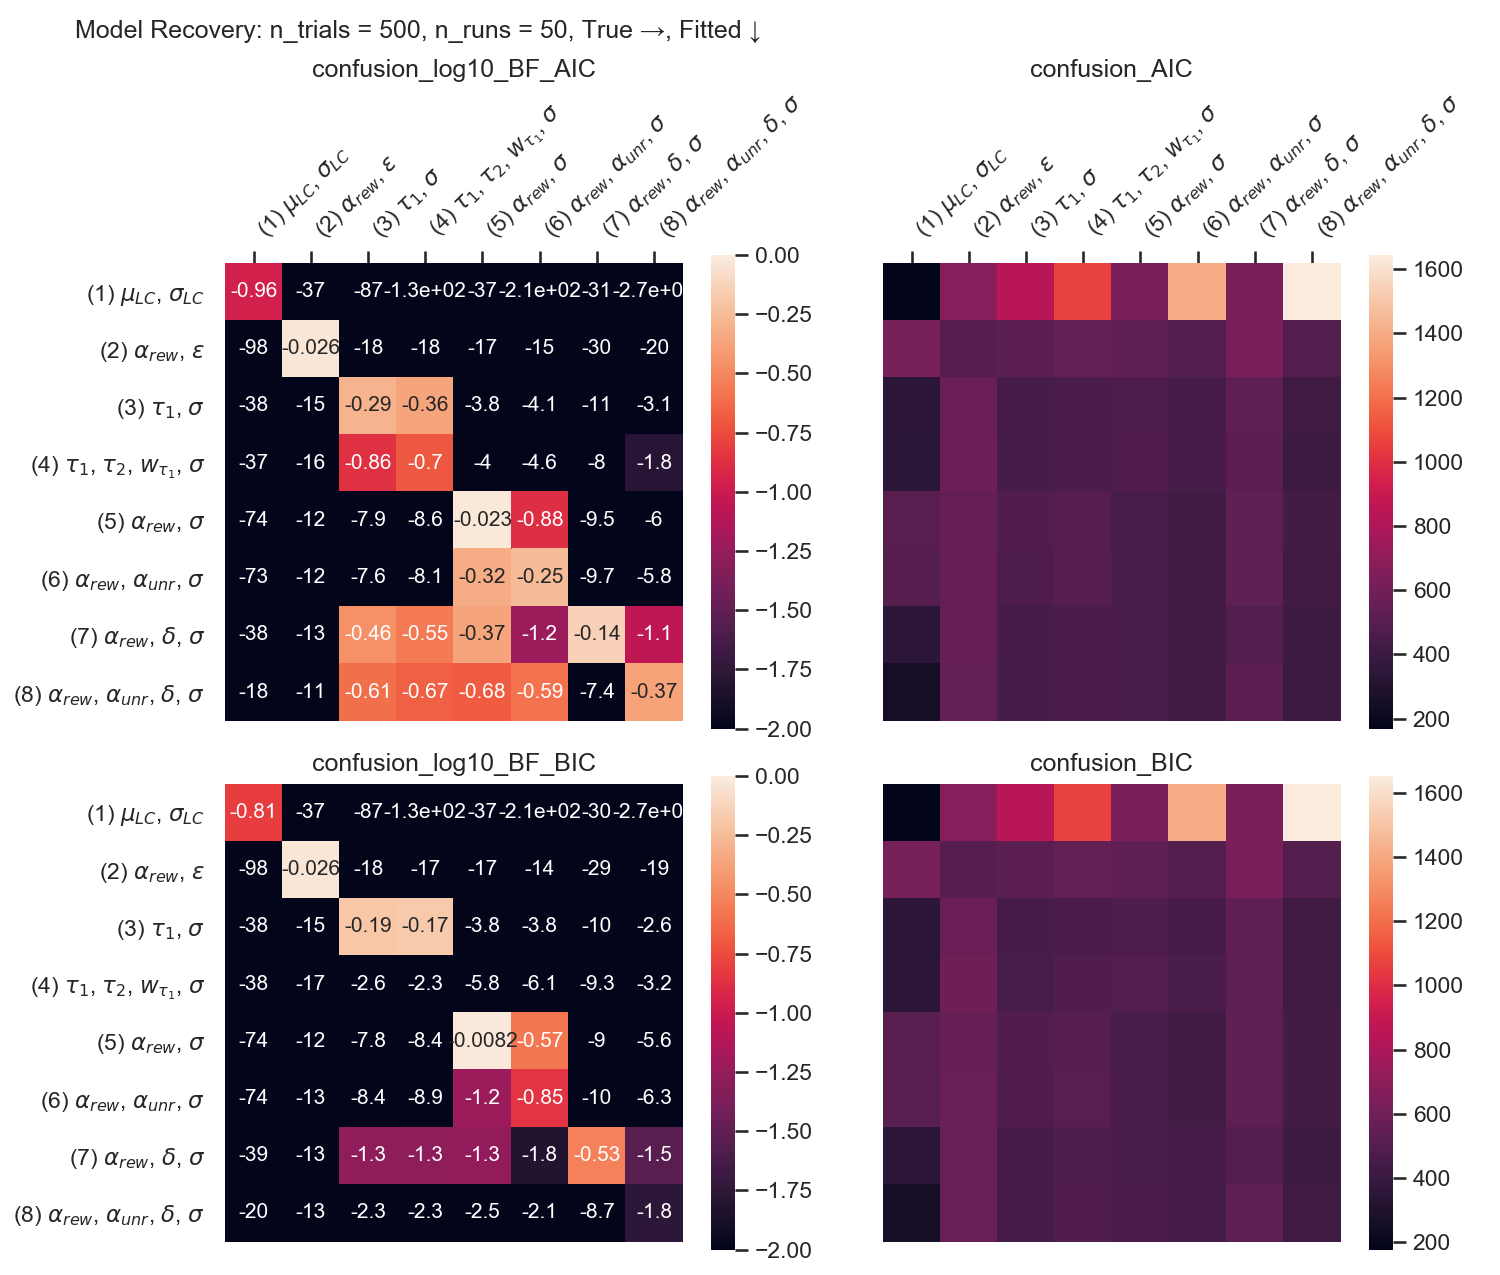

In [10]:
confusion_results = pickle.load(open(".\\results\\confusion_results_2_50_500.p", "rb"))
plot_confusion_matrix(confusion_results)

# Add bias terms (important for real data)

## Fit data with and without bias

Perfect!

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/15:    LossCounting, Km = 2 ... AIC = 1367.24, BIC = 1377.05 (done in 4.52 secs)
Model 2/15:     RW1972_epsi, Km = 2 ... AIC = 1279.99, BIC = 1289.81 (done in 6.64 secs)
Model 3/15:     LNP_softmax, Km = 2 ... AIC = 1234.53, BIC = 1244.35 (done in 4.56 secs)
Model 4/15:     LNP_softmax, Km = 4 ... AIC = 1237.91, BIC = 1257.54 (done in 10.2 secs)
Model 5/15:  RW1972_softmax, Km = 2 ... AIC = 1214.26, BIC = 1224.08 (done in 2.75 secs)
Model 6/15:     Hattori2019, Km = 3 ... AIC = 1212.42, BIC = 1227.15 (done in 7.06 secs)
Model 7/15:        Bari2019, Km = 3 ... AIC = 1216.17, BIC = 1230.89 (done in 4.9 secs)
Model 8/15:     Hattori2019, Km = 4 ... AIC = 1214.53, BIC = 1234.16 (done in 8.82 secs)
Model 9/15:     RW1972_epsi, Km = 3 ... AIC = 1285.38, BIC = 1300.11 (done in 5.11 secs)
Model 10/15:     LNP_softmax, Km = 3 ... AIC = 1236.39, BIC = 1251.12 (done in 7.11 secs)
Model 11/15:     LNP_softmax, Km = 5 .

<IPython.core.display.Javascript object>


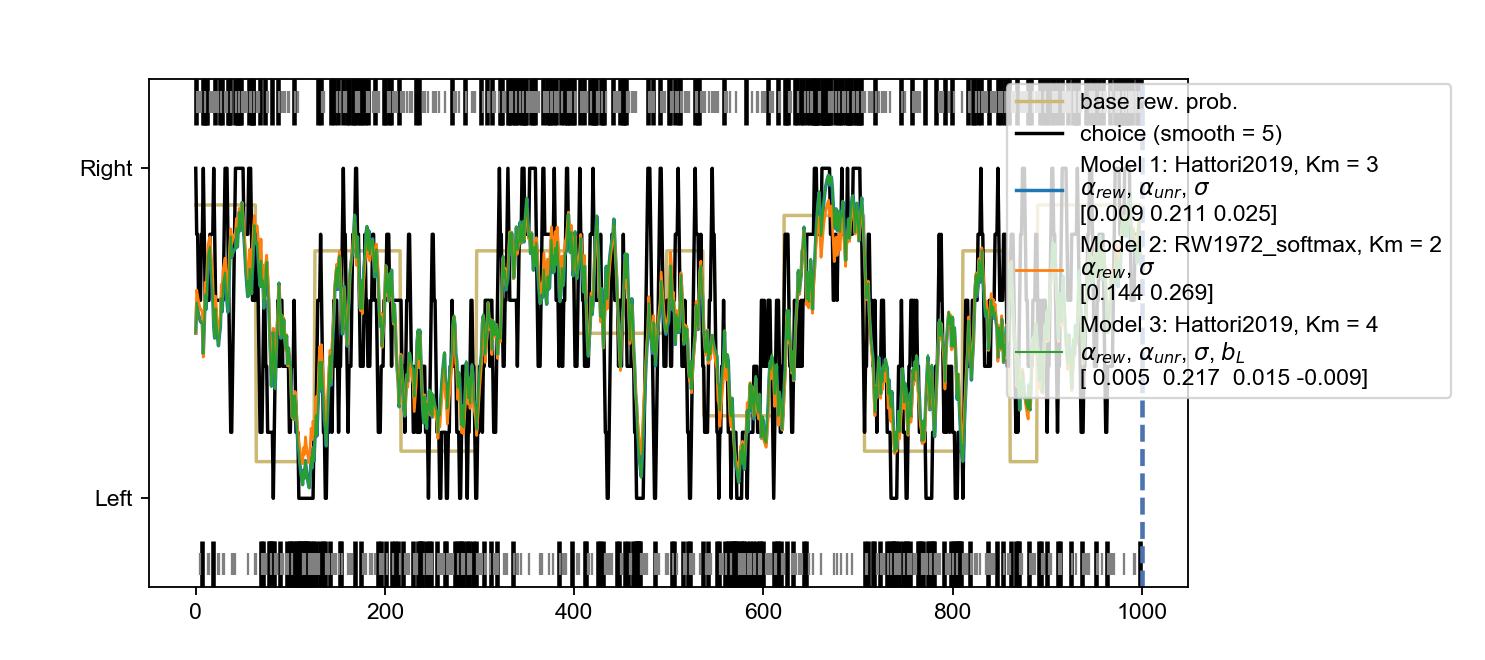

model  Km      AIC  log10_BF_AIC  model_weight_AIC      BIC  \
6      Hattori2019   3  1212.42         -0.00              0.38  1227.15   
5   RW1972_softmax   2  1214.26         -0.40              0.15  1224.08   
13     Hattori2019   4  1214.38         -0.42              0.14  1234.01   
8      Hattori2019   4  1214.53         -0.46              0.13  1234.16   
7         Bari2019   3  1216.17         -0.81              0.06  1230.89   
12  RW1972_softmax   3  1216.26         -0.83              0.06  1230.98   
15     Hattori2019   5  1216.38         -0.86              0.05  1240.92   
14        Bari2019   4  1218.17         -1.25              0.02  1237.80   
3      LNP_softmax   2  1234.53         -4.80              0.00  1244.35   
10     LNP_softmax   3  1236.39         -5.21              0.00  1251.12   
4      LNP_softmax   4  1237.91         -5.53              0.00  1257.54   
11     LNP_softmax   5  1239.76         -5.94              0.00  1264.30   
2      RW1972_epsi   2  1279.99        -14.67              0.00  1289.81   
9      RW1972_epsi   3  1285.38        -15.84              0.00  1300.11   
1     LossCounting   2  1367.24        -33.62              0.00  1377.05   

    log10_BF_BIC  model_weight_BIC  \
6          -0.67              0.17   
5          -0.00              0.77   
13         -2.16              0.01   
8          -2.19              0.00   
7          -1.48              0.03   
12         -1.50              0.02   
15         -3.66              0.00   
14         -2.98              0.00   
3          -4.40              0.00   
10         -5.87              0.00   
4          -7.27              0.00   
11         -8.73              0.00   
2         -14.27              0.00   
9         -16.51              0.00   
1         -33.22              0.00   

                                                para_notation  \
6                    $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   
5                                    $\alpha_{rew}$, $\sigma$   
13            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$   
8          $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
7                          $\alpha_{rew}$, $\delta$, $\sigma$   
12                            $\alpha_{rew}$, $\sigma$, $b_L$   
15  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$   
14                  $\alpha_{rew}$, $\delta$, $\sigma$, $b_L$   
3                                          $\tau_1$, $\sigma$   
10                                  $\tau_1$, $\sigma$, $b_L$   
4                  $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
11          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$   
2                                  $\alpha_{rew}$, $\epsilon$   
9                           $\alpha_{rew}$, $\epsilon$, $b_L$   
1                                   $\mu_{LC}$, $\sigma_{LC}$   

                              para_fitted  
6                   [0.009, 0.211, 0.025]  
5                          [0.144, 0.269]  
13          [0.005, 0.217, 0.015, -0.009]  
8              [0.016, 0.217, 0.0, 0.042]  
7                   [0.144, 0.003, 0.268]  
12                 [0.144, 0.269, -0.003]  
15      [0.004, 0.214, 0.0, 0.01, -0.006]  
14          [0.144, 0.003, 0.268, -0.003]  
3                          [7.134, 0.301]  
10                 [7.125, 0.302, -0.026]  
4           [3.139, 10.369, 0.273, 0.294]  
11  [3.109, 10.343, 0.271, 0.295, -0.026]  
2                          [0.121, 0.646]  
9                  [0.279, 0.632, -0.052]  
1                           [3.759, 10.0]

<IPython.core.display.Javascript object>


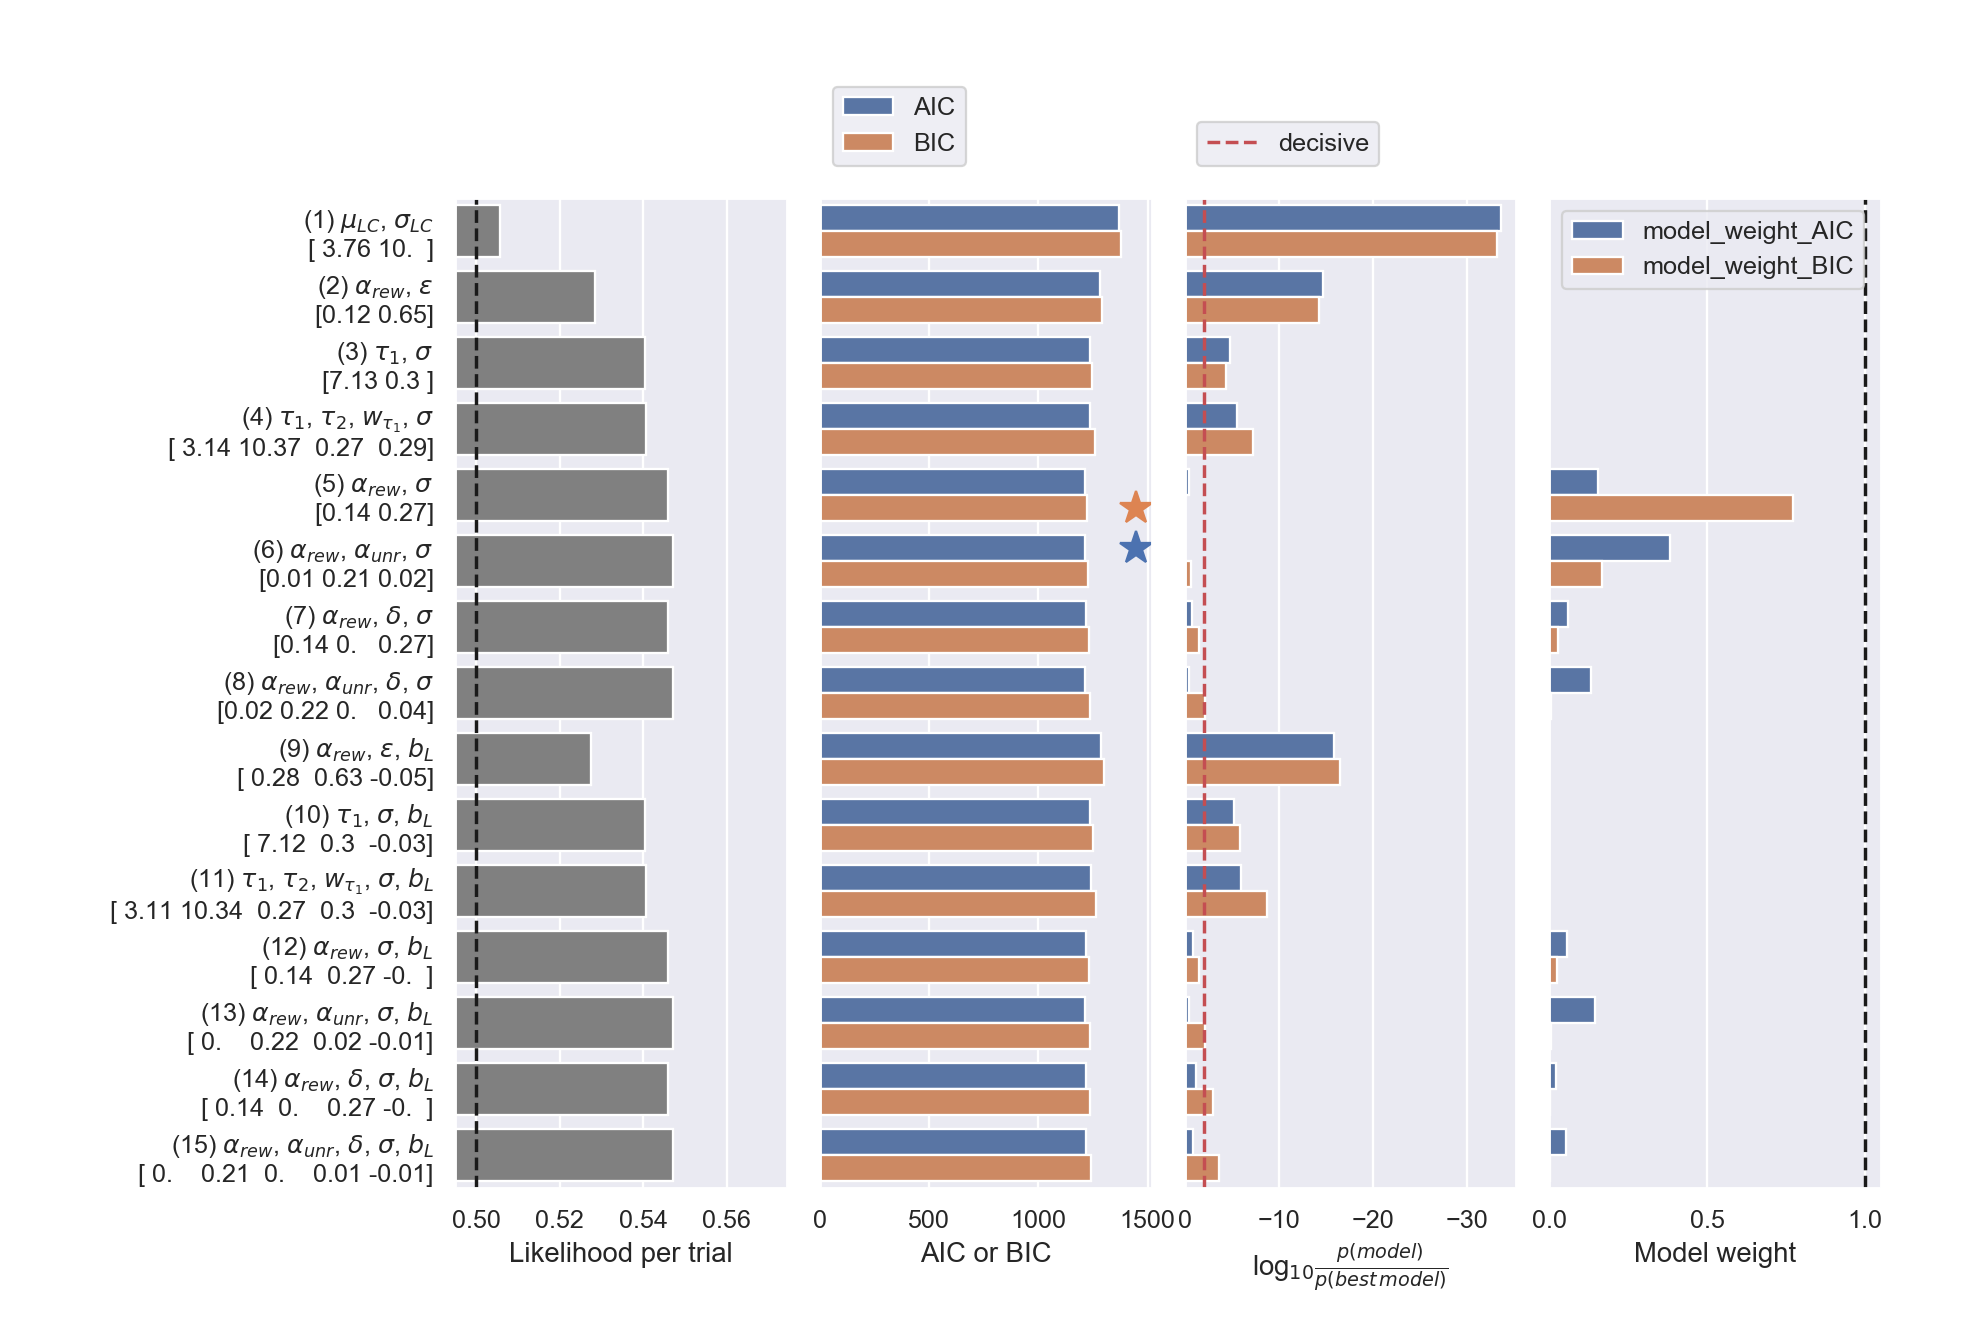

In [9]:
choice_history, reward_history, p_reward = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature'], [0.2,0.3])
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward) 
model_comparison.fit(pool = pool, plot_predictive=[1,2,3]) # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/15:    LossCounting, Km = 2 ... AIC = 1384.38, BIC = 1394.19 (done in 5.62 secs)
Model 2/15:     RW1972_epsi, Km = 2 ... AIC = 934.548, BIC = 944.364 (done in 16.3 secs)
Model 3/15:     LNP_softmax, Km = 2 ... AIC = 1075.36, BIC = 1085.18 (done in 13.4 secs)
Model 4/15:     LNP_softmax, Km = 4 ... AIC = 1172.65, BIC = 1192.28 (done in 24 secs)
Model 5/15:  RW1972_softmax, Km = 2 ... AIC = 1239.49, BIC = 1249.31 (done in 8 secs)
Model 6/15:     Hattori2019, Km = 3 ... AIC = 1392.29, BIC = 1407.02 (done in 3.54 secs)
Model 7/15:        Bari2019, Km = 3 ... AIC = 988.142, BIC = 1002.87 (done in 6.36 secs)
Model 8/15:     Hattori2019, Km = 4 ... AIC = 955.068, BIC = 974.699 (done in 13.1 secs)
Model 9/15:     RW1972_epsi, Km = 3 ... AIC = 917.138, BIC = 931.861 (done in 5.72 secs)
Model 10/15:     LNP_softmax, Km = 3 ... AIC = 905.22, BIC = 919.943 (done in 5.8 secs)
Model 11/15:     LNP_softmax, Km = 5 ... AIC

<IPython.core.display.Javascript object>


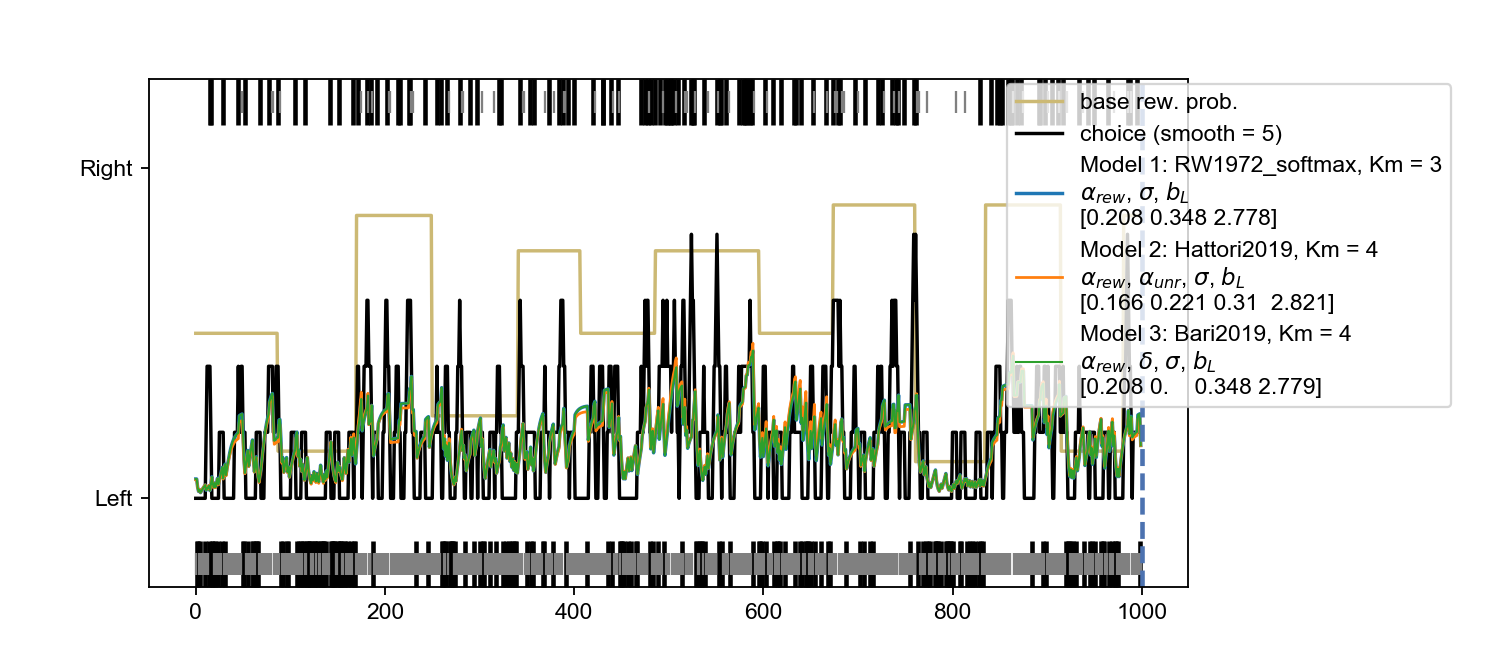

model  Km      AIC  log10_BF_AIC  model_weight_AIC      BIC  \
12  RW1972_softmax   3   882.09         -0.00              0.50   896.81   
13     Hattori2019   4   883.58         -0.32              0.24   903.21   
14        Bari2019   4   884.09         -0.43              0.18   903.72   
15     Hattori2019   5   885.58         -0.76              0.09   910.11   
10     LNP_softmax   3   905.22         -5.02              0.00   919.94   
11     LNP_softmax   5   909.22         -5.89              0.00   933.76   
9      RW1972_epsi   3   917.14         -7.61              0.00   931.86   
2      RW1972_epsi   2   934.55        -11.39              0.00   944.36   
8      Hattori2019   4   955.07        -15.85              0.00   974.70   
7         Bari2019   3   988.14        -23.03              0.00  1002.87   
3      LNP_softmax   2  1075.36        -41.97              0.00  1085.18   
4      LNP_softmax   4  1172.65        -63.09              0.00  1192.28   
5   RW1972_softmax   2  1239.49        -77.61              0.00  1249.31   
1     LossCounting   2  1384.38       -109.07              0.00  1394.19   
6      Hattori2019   3  1392.29       -110.79              0.00  1407.02   

    log10_BF_BIC  model_weight_BIC  \
12         -0.00              0.93   
13         -1.39              0.04   
14         -1.50              0.03   
15         -2.89              0.00   
10         -5.02              0.00   
11         -8.02              0.00   
9          -7.61              0.00   
2         -10.33              0.00   
8         -16.91              0.00   
7         -23.03              0.00   
3         -40.90              0.00   
4         -64.16              0.00   
5         -76.54              0.00   
1        -108.01              0.00   
6        -110.79              0.00   

                                                para_notation  \
12                            $\alpha_{rew}$, $\sigma$, $b_L$   
13            $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$, $b_L$   
14                  $\alpha_{rew}$, $\delta$, $\sigma$, $b_L$   
15  $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$, $b_L$   
10                                  $\tau_1$, $\sigma$, $b_L$   
11          $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$, $b_L$   
9                           $\alpha_{rew}$, $\epsilon$, $b_L$   
2                                  $\alpha_{rew}$, $\epsilon$   
8          $\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$   
7                          $\alpha_{rew}$, $\delta$, $\sigma$   
3                                          $\tau_1$, $\sigma$   
4                  $\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$   
5                                    $\alpha_{rew}$, $\sigma$   
1                                   $\mu_{LC}$, $\sigma_{LC}$   
6                    $\alpha_{rew}$, $\alpha_{unr}$, $\sigma$   

                          para_fitted  
12              [0.208, 0.348, 2.778]  
13        [0.166, 0.221, 0.31, 2.821]  
14         [0.208, 0.0, 0.348, 2.779]  
15   [0.166, 0.221, 0.0, 0.31, 2.821]  
10               [4.511, 0.462, 1.46]  
11  [4.511, 10.511, 1.0, 0.462, 1.46]  
9               [0.783, 0.881, 0.414]  
2                      [0.001, 0.351]  
8          [0.075, 0.0, 0.008, 0.226]  
7                  [0.0, 0.001, 0.01]  
3                      [100.0, 0.061]  
4         [2.389, 40.0, 0.062, 0.107]  
5                        [0.0, 0.051]  
1                       [8.691, 10.0]  
6                   [0.0, 1.0, 7.638]

<IPython.core.display.Javascript object>


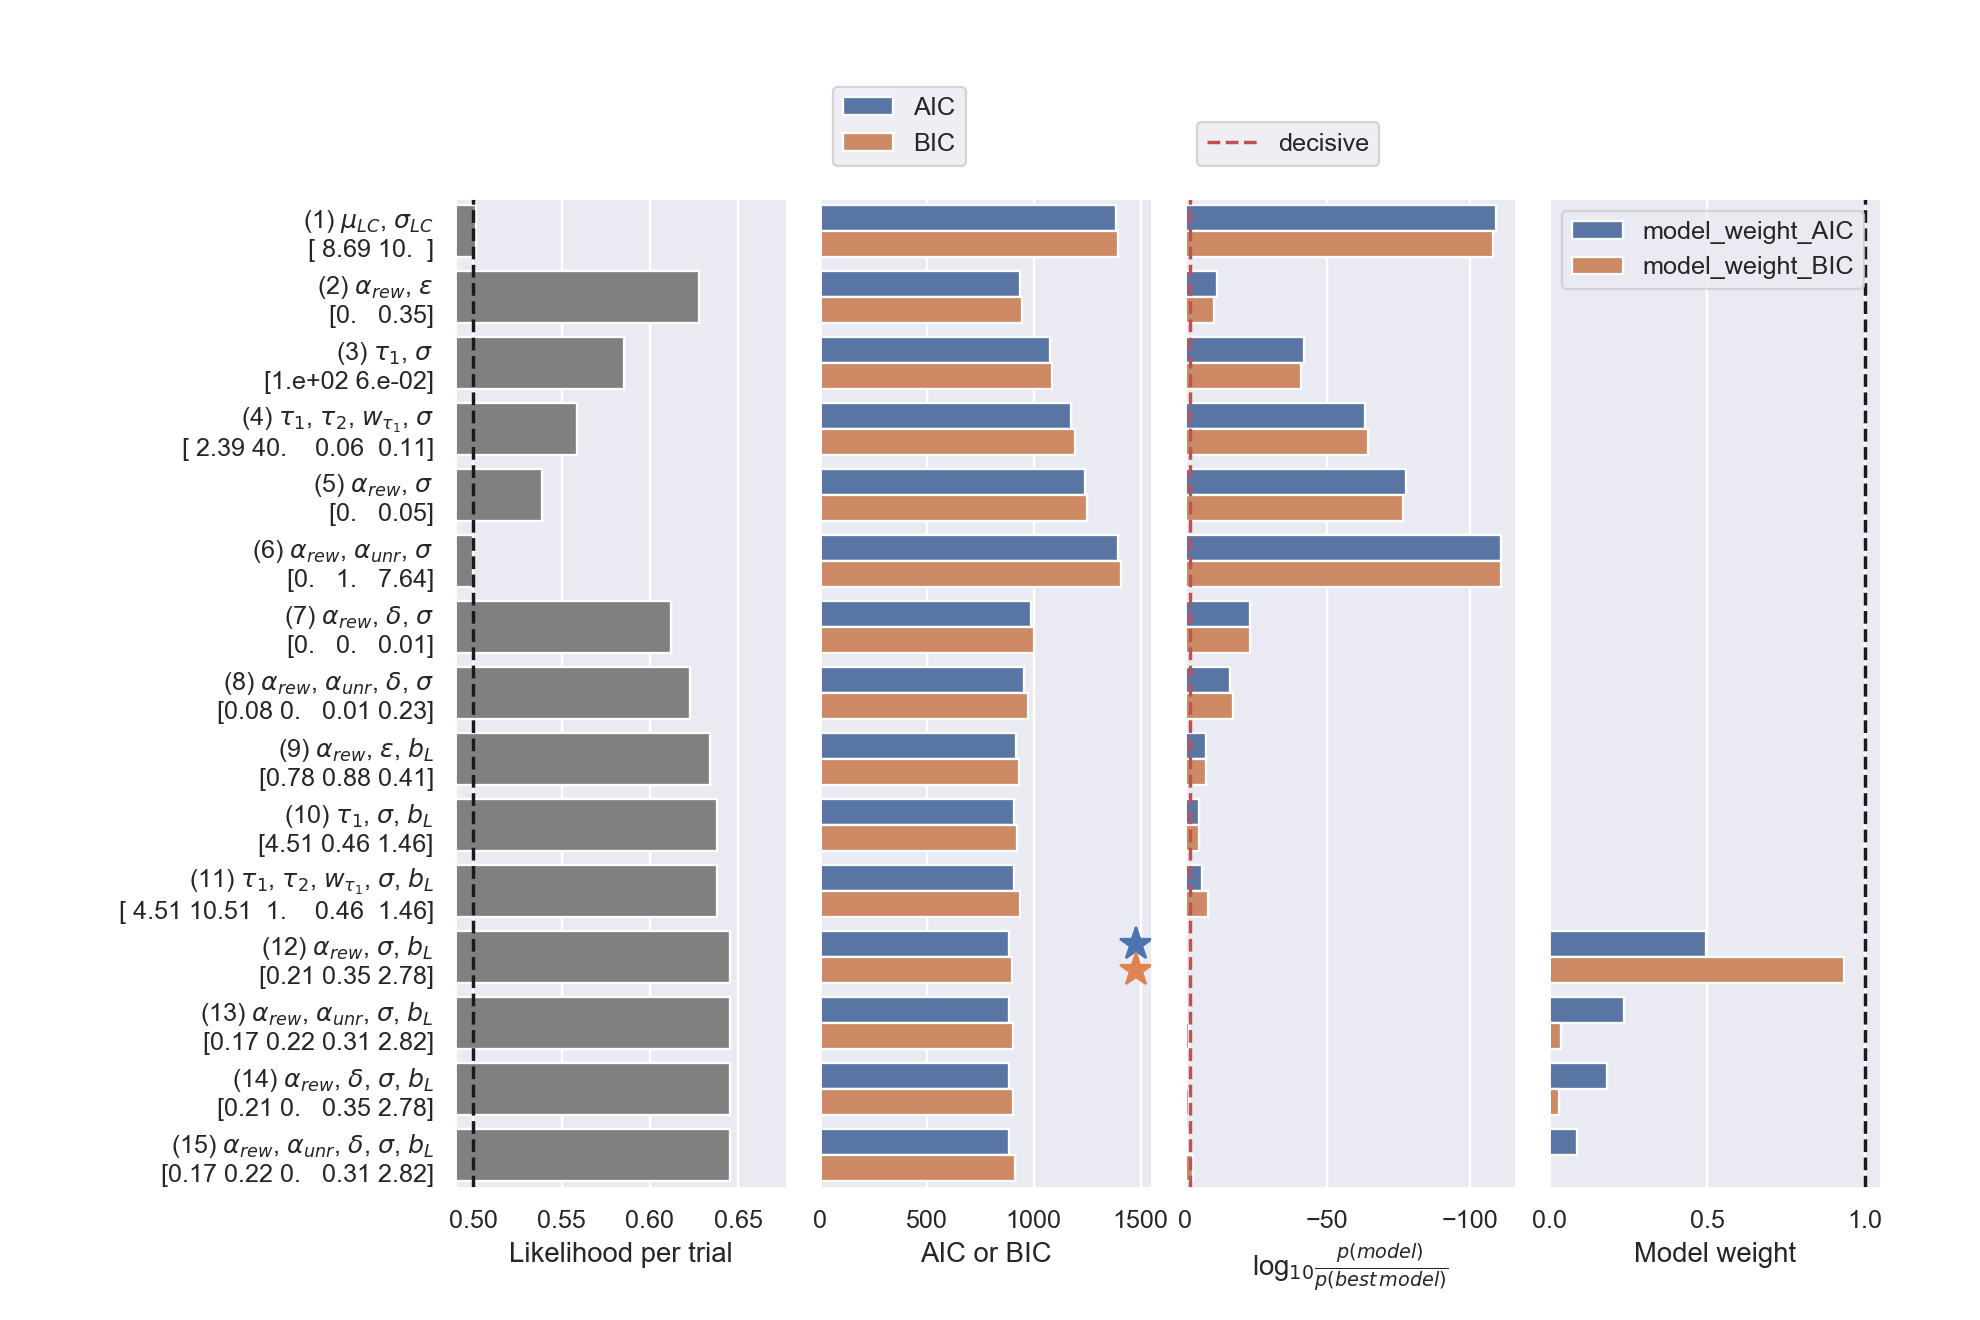

In [10]:
choice_history, reward_history, p_reward = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature', 'biasL'], [0.2,0.3,3])
model_comparison = BanditModelComparison(choice_history, reward_history, p_reward)
model_comparison.fit(pool = pool, plot_predictive=[1,2,3]) # Plot predictive traces for the 1st, 2nd, and 3rd models
model_comparison.show()
model_comparison.plot()

## Confusion matrix

Let's use fewer models and focus on bias.

```python
def generate_random_para(forager, para_name):
    # With slightly narrower range than fitting bounds in BanditModelComparison
    if para_name in 'loss_count_threshold_mean':
        return np.random.uniform(0, 30)
    if para_name in 'loss_count_threshold_std':
        return np.random.uniform(0, 5)
    if para_name in ['tau1', 'tau2']:
        return 10**np.random.uniform(0, np.log10(30)) 
    if para_name in ['w_tau1', 'learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'epsilon']:
        return np.random.uniform(0, 1)
    if para_name in 'softmax_temperature':
        return 1/np.random.exponential(10)
    if para_name in ['biasL']:
        if forager in ['Random', 'pMatching', 'RW1972_epsi']:
            return np.random.uniform(-0.45, 0.45)
        elif forager in ['RW1972_softmax', 'LNP_softmax', 'Bari2019', 'Hattori2019']:
            return np.random.uniform(-5, 5)
```

In [3]:
models = [
            # No bias (1-8)
            # ['LossCounting', ['loss_count_threshold_mean', 'loss_count_threshold_std'], [0,0], [40,10]],                   
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon'],[0, 0],[1, 1]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature'], [1e-3, 1e-2], [100, 15]],                 
            # ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature'],[1e-3, 1e-1, 0, 1e-2],[15, 40, 1, 15]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature'],[0, 1e-2],[1, 15]],
            # ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature'],[0, 0, 1e-2],[1, 1, 15]],
            # ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature'],[0, 0, 0, 1e-2],[1, 1, 1, 15]],
            
            # With bias (9-16)
            ['RW1972_epsi', ['learn_rate_rew', 'epsilon', 'biasL'],[0, 0, -0.5],[1, 1, 0.5]],
            ['LNP_softmax',  ['tau1', 'softmax_temperature', 'biasL'], [1e-3, 1e-2, -5], [100, 15, 5]],                 
            # ['LNP_softmax', ['tau1', 'tau2', 'w_tau1', 'softmax_temperature', 'biasL'],[1e-3, 1e-1, 0, 1e-2, -5],[15, 40, 1, 15, 5]],                 
            ['RW1972_softmax', ['learn_rate_rew', 'softmax_temperature', 'biasL'],[0, 1e-2, -5],[1, 15, 5]],
            # ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'softmax_temperature', 'biasL'],[0, 0, 1e-2, -5],[1, 1, 15, 5]],
            ['Bari2019', ['learn_rate_rew', 'forget_rate', 'softmax_temperature', 'biasL'],[0, 0, 1e-2, -5],[1, 1, 15, 5]],
            # ['Hattori2019', ['learn_rate_rew', 'learn_rate_unrew', 'forget_rate', 'softmax_temperature', 'biasL'],[0, 0, 0, 1e-2, -5],[1, 1, 1, 15, 5]],
         ]

compute_confusion_matrix(models = models, n_runs = 100, n_trials = 1000, pool = pool, 
                         save_file = 'confusion_results_3_100_1000_bias.p')

Runs: 100%|██████████████████████████████████████████████████████████████████████| 100/100 [10:55:00<00:00, 393.00s/it]


<IPython.core.display.Javascript object>


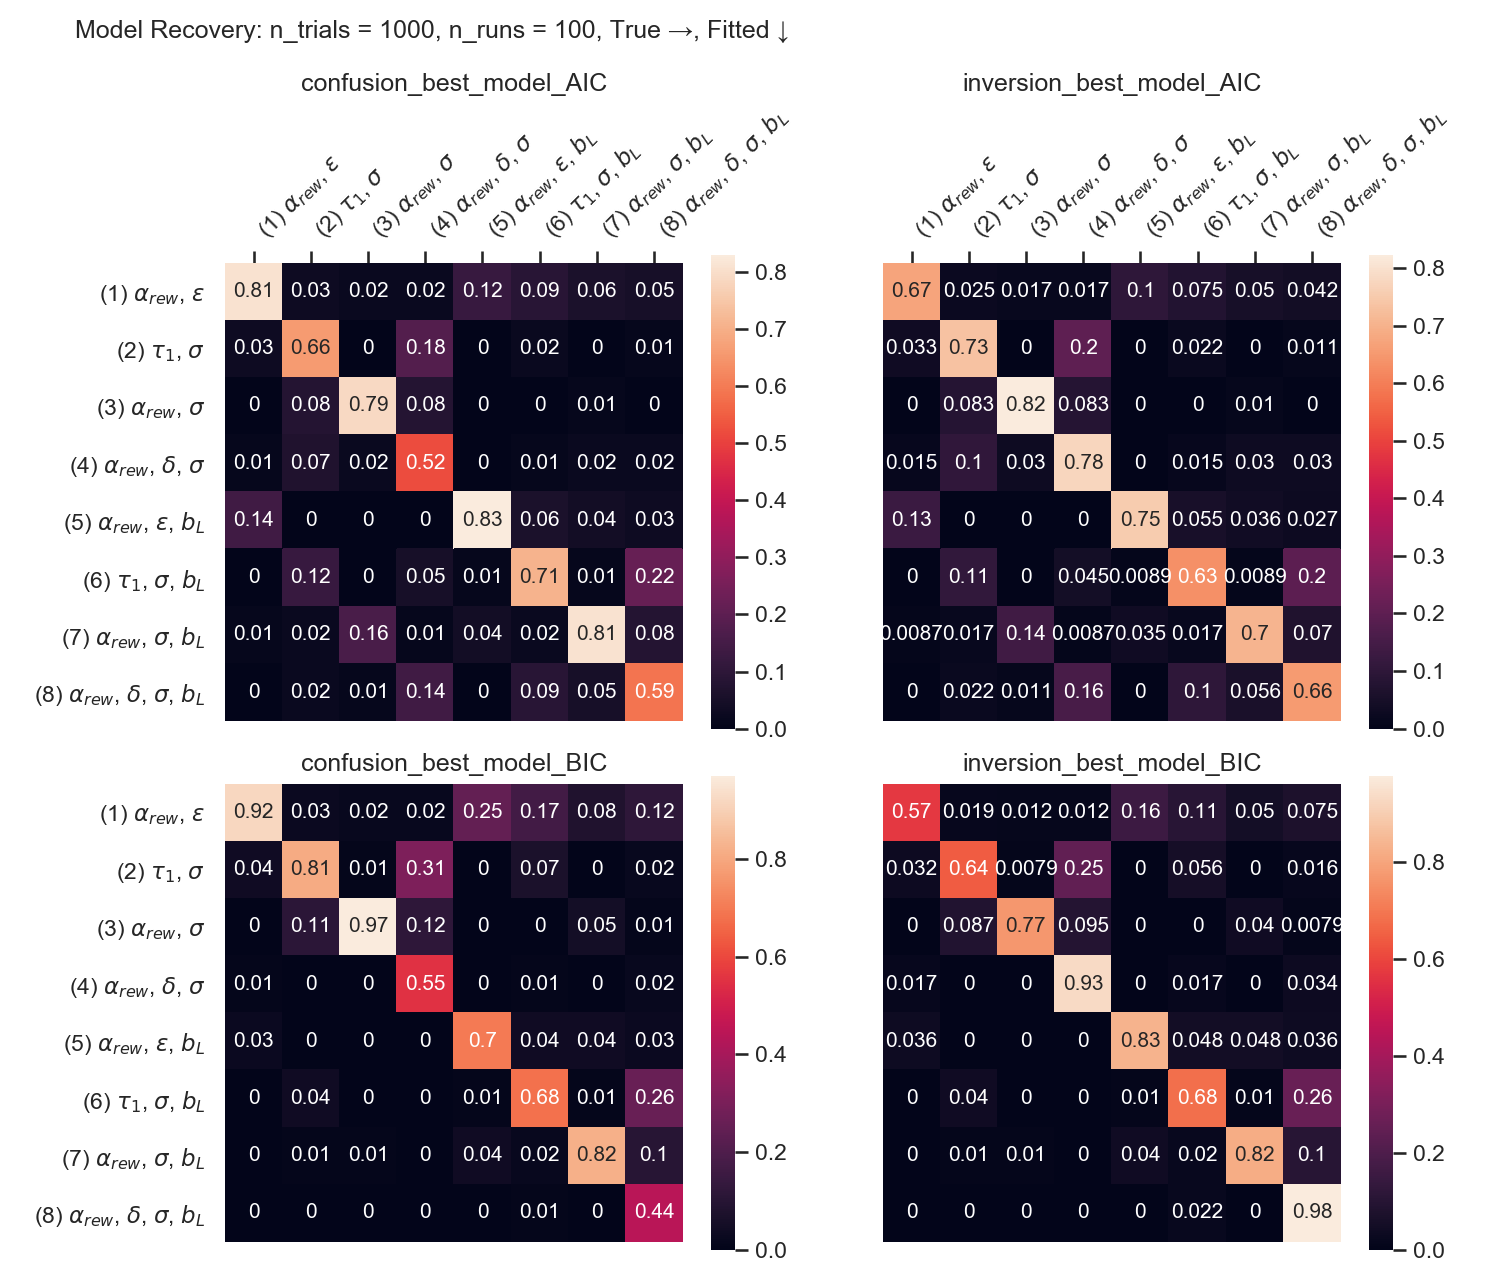

<IPython.core.display.Javascript object>


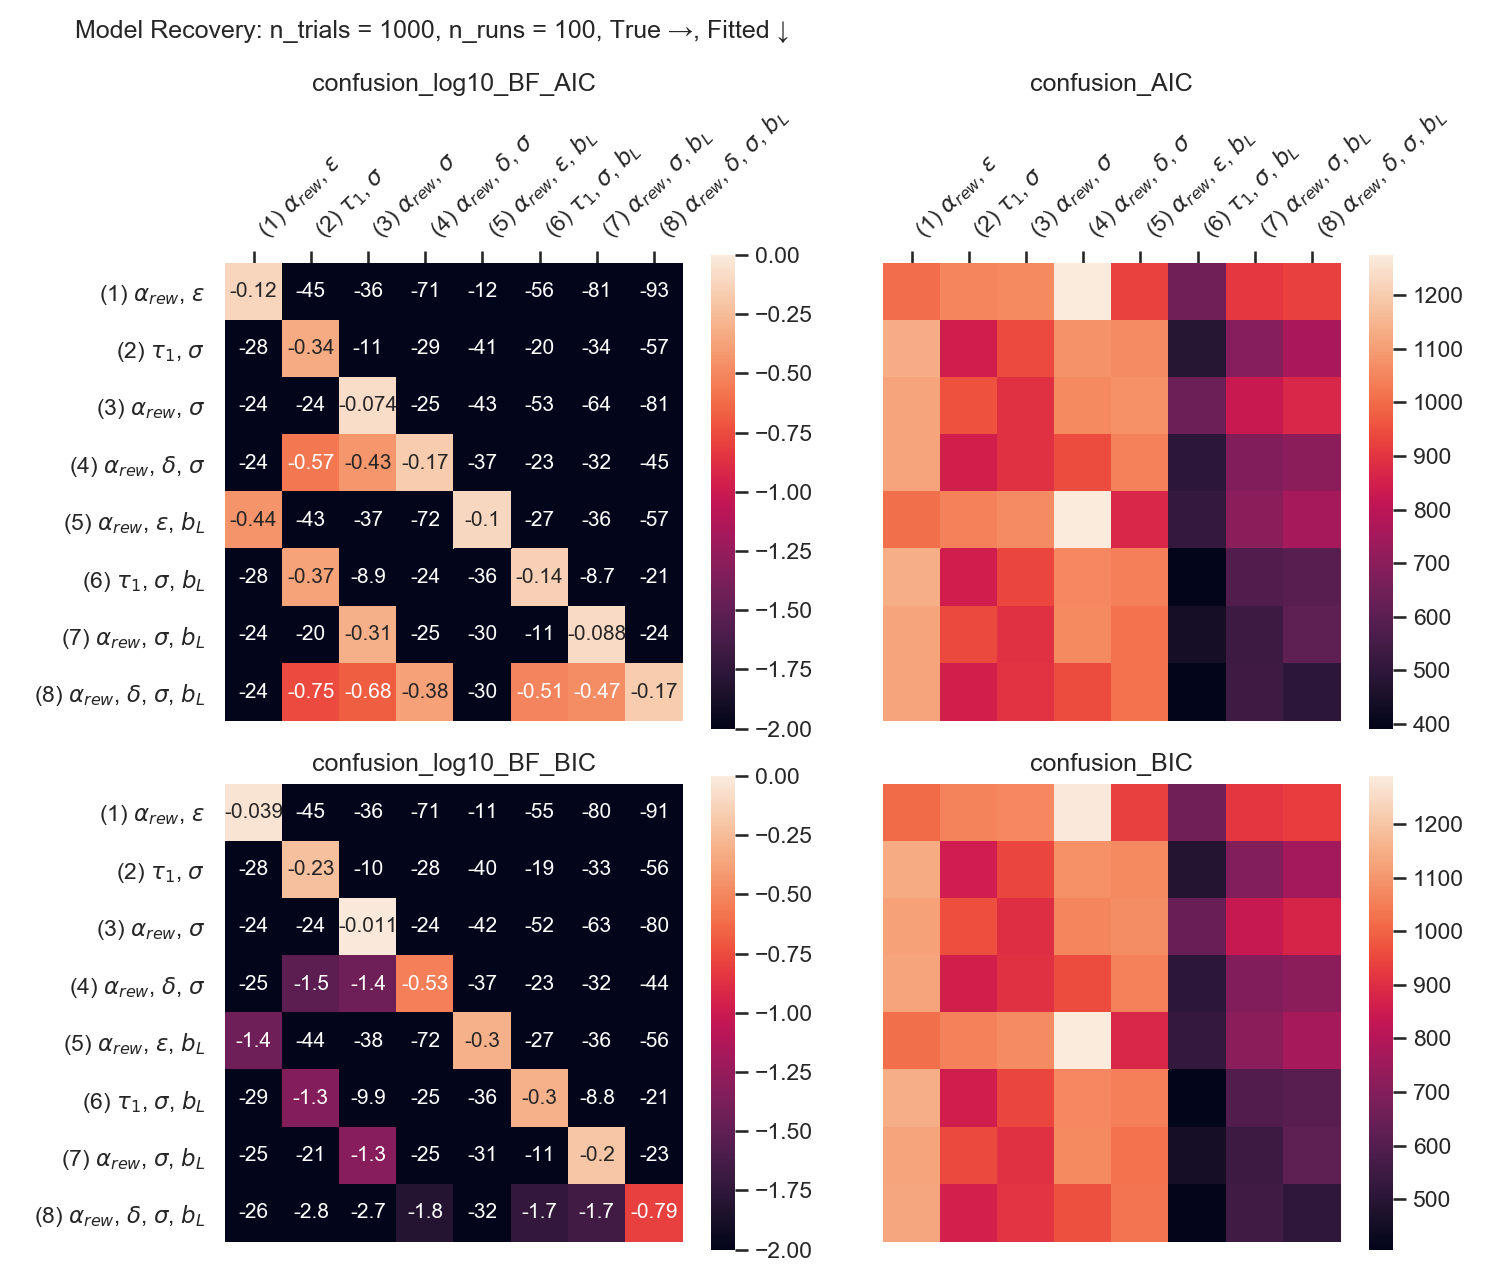

In [4]:
confusion_results = pickle.load(open(".\\results\\confusion_results_3_100_1000_bias.p", "rb"))
plot_confusion_matrix(confusion_results)
